In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import The Data-Set

In [196]:
# import train data
train = pd.read_excel('capstone_train.xlsx')

# import test data
test = pd.read_excel('capstone_test.xlsx')

 # Data Understanding

# Read the Dataset

In [197]:
#Show the first 10 row of train data set
train.head(10)

Loan_ID  Loan_Amount_Requested Length_Employed Home_Owner  \
0  10000001.0                 7000.0        < 1 year       Rent   
1  10000002.0                30000.0         4 years   Mortgage   
2  10000003.0                24725.0         7 years   Mortgage   
3  10000004.0                16000.0        < 1 year        NaN   
4  10000005.0                17000.0         8 years        Own   
5  10000006.0                 4500.0         2 years       Rent   
6  10000007.0                18075.0         4 years       Rent   
7  10000008.0                15000.0        < 1 year       Rent   
8  10000009.0                 6300.0       10+ years       Rent   
9  10000010.0                30000.0       10+ years        Own   

   Annual_Income           Income_Verified     Purpose_Of_Loan  \
0        68000.0              not verified                 car   
1            NaN         VERIFIED - income  debt_consolidation   
2        75566.4  VERIFIED - income source  debt_consolidation   
3        56160.0  VERIFIED - income source  debt_consolidation   
4        96000.0  VERIFIED - income source  debt_consolidation   
5        30000.0  VERIFIED - income source         credit_card   
6        85000.0         VERIFIED - income  debt_consolidation   
7       115000.0         VERIFIED - income  debt_consolidation   
8            NaN              not verified  debt_consolidation   
9       163000.0         VERIFIED - income  debt_consolidation   

   Debt_To_Income  Inquiries_Last_6Mo  Months_Since_Deliquency  \
0           18.37                 0.0                      NaN   
1           14.93                 0.0                     17.0   
2           15.88                 0.0                      NaN   
3           14.34                 3.0                      NaN   
4           22.17                 1.0                      NaN   
5           10.88                 1.0                      NaN   
6            5.65                 0.0                      NaN   
7            7.97                 1.0                     16.0   
8           16.12                 3.0                      NaN   
9           11.13                 0.0                      NaN   

   Number_Open_Accounts  Total_Accounts  Gender  Interest_Rate  
0                   9.0            14.0  Female            1.0  
1                  12.0            24.0  Female            3.0  
2                  12.0            16.0    Male            3.0  
3                  16.0            22.0    Male            3.0  
4                  19.0            30.0  Female            1.0  
5                  12.0            15.0    Male            3.0  
6                   9.0            12.0    Male            3.0  
7                  25.0            31.0  Female            2.0  
8                   8.0             9.0  Female            3.0  
9                  24.0            43.0    Male            1.0

# Data-Type

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  float64
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  float64
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  float64
 11  Total_Accounts           164309 non-null  float64
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  float64
dtypes: f

In [120]:
# The target variable 'Interest_Rate' has 'object' datatype, it is already in encoded form.

In [199]:
#  the variable Loan_amount_requested is type casted into int type.
train['Loan_Amount_Requested']=train['Loan_Amount_Requested'].astype(int)

# Statistic

In [200]:
train.describe().T

count          mean           std         min  \
Loan_ID                  164309.0  1.008216e+07  47432.067027  10000001.0   
Loan_Amount_Requested    164309.0  1.434934e+04   8281.868700       500.0   
Annual_Income            139207.0  7.333116e+04  60377.498294      4000.0   
Debt_To_Income           164309.0  1.720719e+01      7.845083         0.0   
Inquiries_Last_6Mo       164309.0  7.816979e-01      1.034747         0.0   
Months_Since_Deliquency   75930.0  3.422936e+01     21.761180         0.0   
Number_Open_Accounts     164309.0  1.119382e+01      4.991813         0.0   
Total_Accounts           164309.0  2.506767e+01     11.583067         2.0   
Interest_Rate            164309.0  2.158951e+00      0.738364         1.0   

                                 25%          50%          75%          max  
Loan_ID                  10041078.00  10082155.00  10123232.00  10164309.00  
Loan_Amount_Requested        8000.00     12075.00     20000.00     35000.00  
Annual_Income               45000.00     63000.00     88697.50   7500000.00  
Debt_To_Income                 11.37        16.84        22.78        39.99  
Inquiries_Last_6Mo              0.00         0.00         1.00         8.00  
Months_Since_Deliquency        16.00        31.00        50.00       180.00  
Number_Open_Accounts            8.00        10.00        14.00        76.00  
Total_Accounts                 17.00        23.00        32.00       156.00  
Interest_Rate                   2.00         2.00         3.00         3.00

In [201]:
#  transposed 5 point summary of the data.

# Size

In [202]:
r,c=train.shape
print("There are {} Row and {} Columns is the Data-set".format(r,c))

There are 164309 Row and 14 Columns is the Data-set


# Missing  Values

In [203]:
#sum of total missing values and sort to desending
Total = train.isnull().sum().sort_values(ascending=False)          
#total in percent of missing value
Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   
#create a Dataframe to show missing value sum and precent format 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Months_Since_Deliquency  88379                     53.788289
Home_Owner               25349                     15.427639
Annual_Income            25102                     15.277313
Length_Employed           7371                      4.486060
Loan_ID                      0                      0.000000
Loan_Amount_Requested        0                      0.000000
Income_Verified              0                      0.000000
Purpose_Of_Loan              0                      0.000000
Debt_To_Income               0                      0.000000
Inquiries_Last_6Mo           0                      0.000000
Number_Open_Accounts         0                      0.000000
Total_Accounts               0                      0.000000
Gender                       0                      0.000000
Interest_Rate                0                      0.000000

In [126]:
# Months_Since_Deliquency contain 53% of null values which is very high hence we need to treat all of them by significant approach

In [204]:
print("Total Missing Null in data-set is:",train.isnull().sum().sum()) 

Total Missing Null in data-set is: 146201


In [205]:
n=np.round(train.isnull().sum().sum()/(train.shape[0]*train.shape[1])*100,2) 
print(n,"% of Total Missing Value")

6.36 % of Total Missing Value


# Skewness

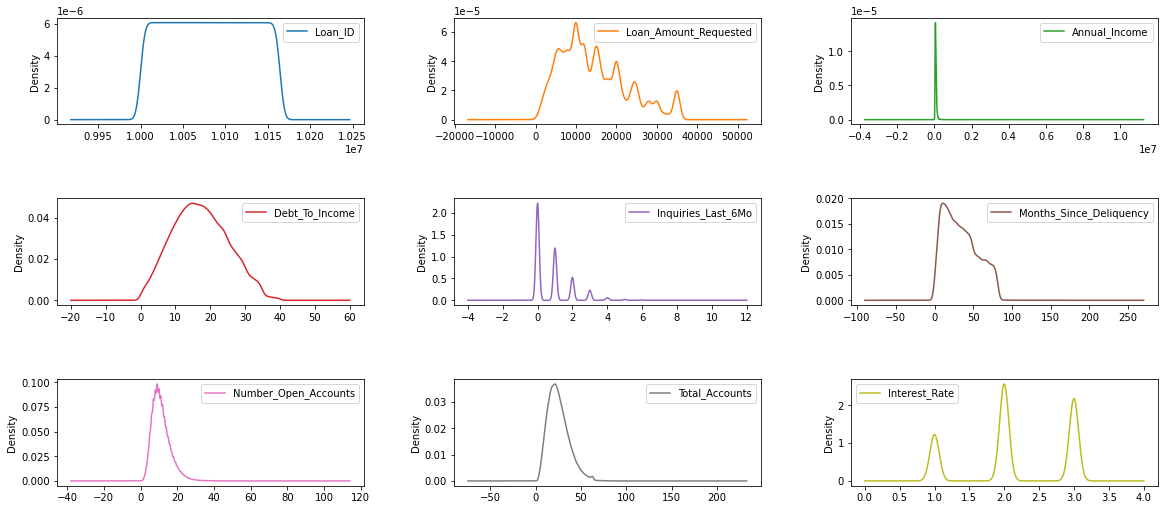

In [129]:
# Plot the skewness 
plt.rcParams["figure.figsize"] = [17,8]
df_num = train.select_dtypes(include = np.number )
df_num.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout(pad = 4)
plt.show()

In [130]:
#Skewness values
train.skew().sort_values(ascending=False)

Annual_Income              40.225306
Inquiries_Last_6Mo          1.550867
Number_Open_Accounts        1.164084
Total_Accounts              0.817347
Loan_Amount_Requested       0.727216
Months_Since_Deliquency     0.460900
Debt_To_Income              0.192204
Loan_ID                     0.000000
Interest_Rate              -0.260932
dtype: float64

### inference - 
Based on the skewness values , it seems like 'Annual_Income' has the highest skewness value of 40.225306, indicating a highly asymmetric distribution. 'Inquiries_Last_6Mo' and 'Number_Open_Accounts' also have high skewness values, indicating that their distributions may be skewed to the right.

# UNIVARIATE ANALYSIS for numerical variable

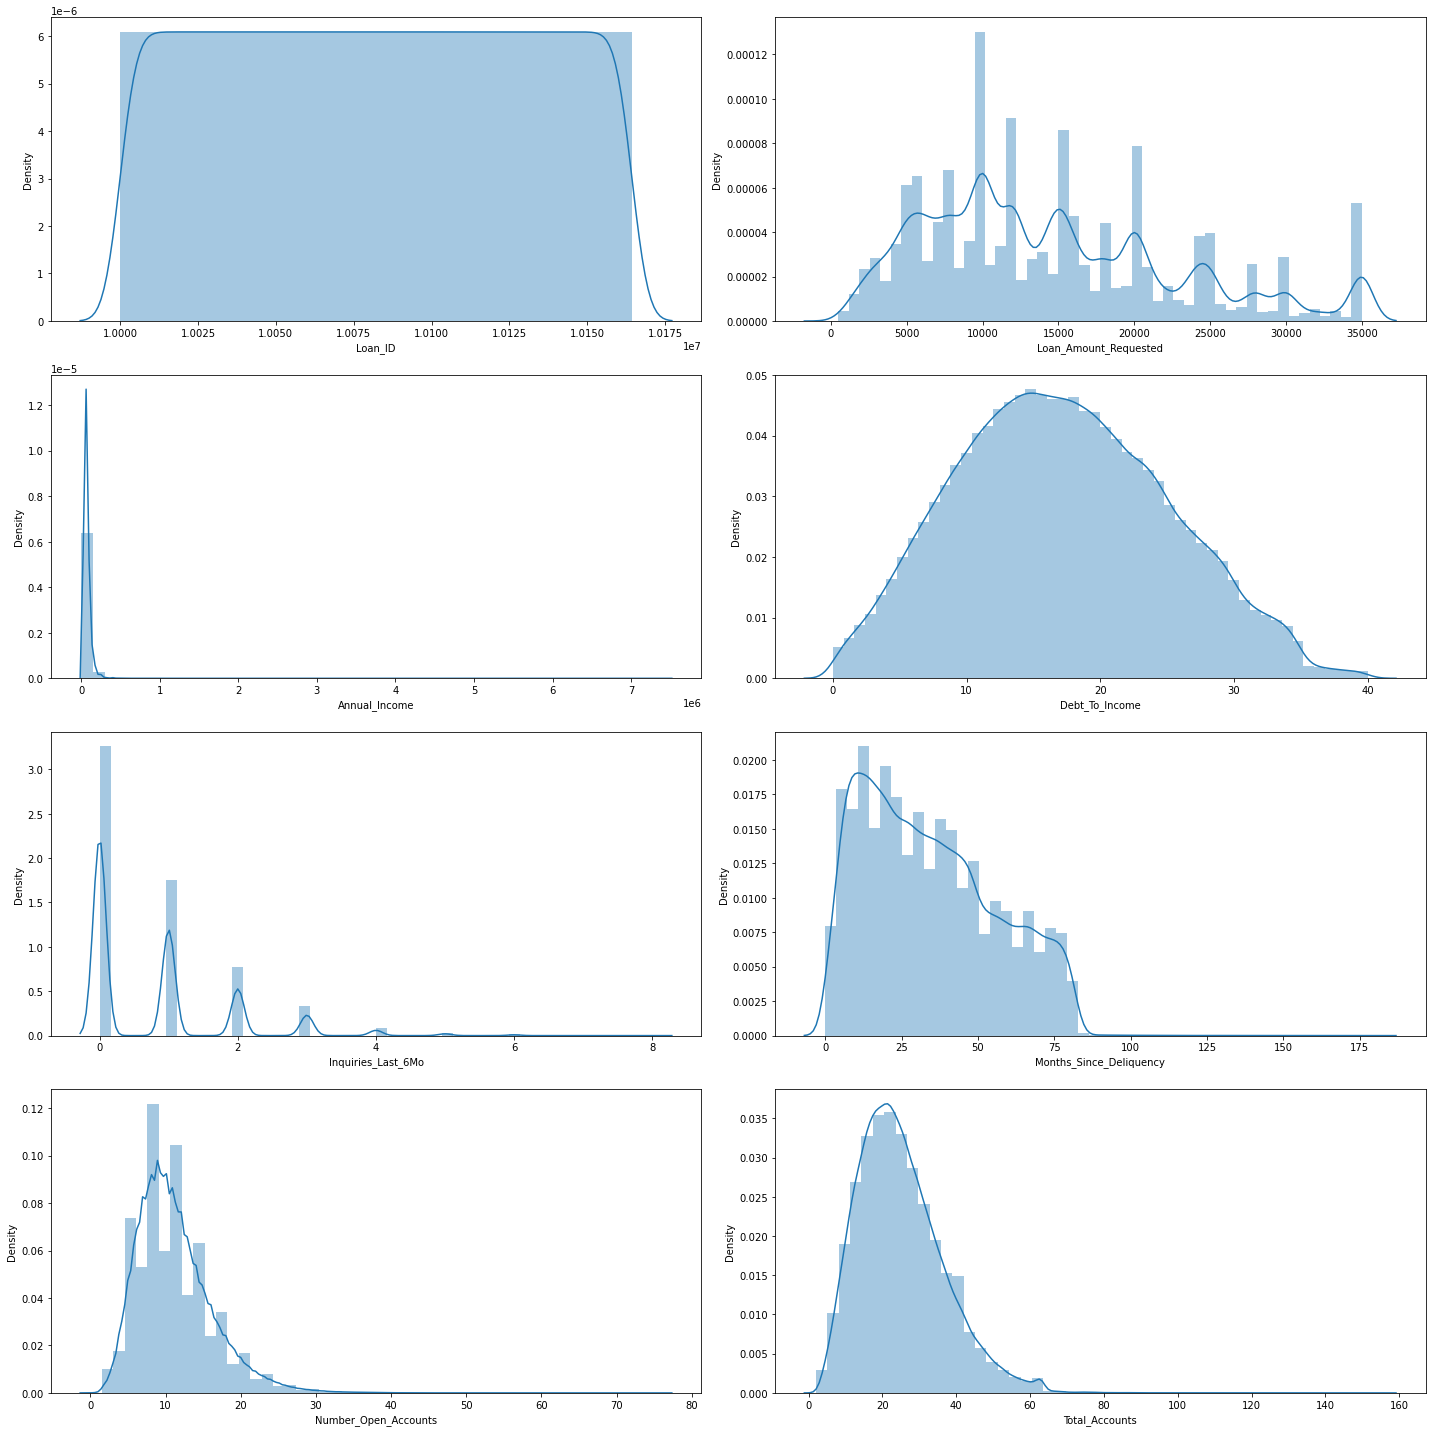

In [206]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i,a in zip(train.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(train[i],ax=a)
    plt.tight_layout()
    fig.show() 

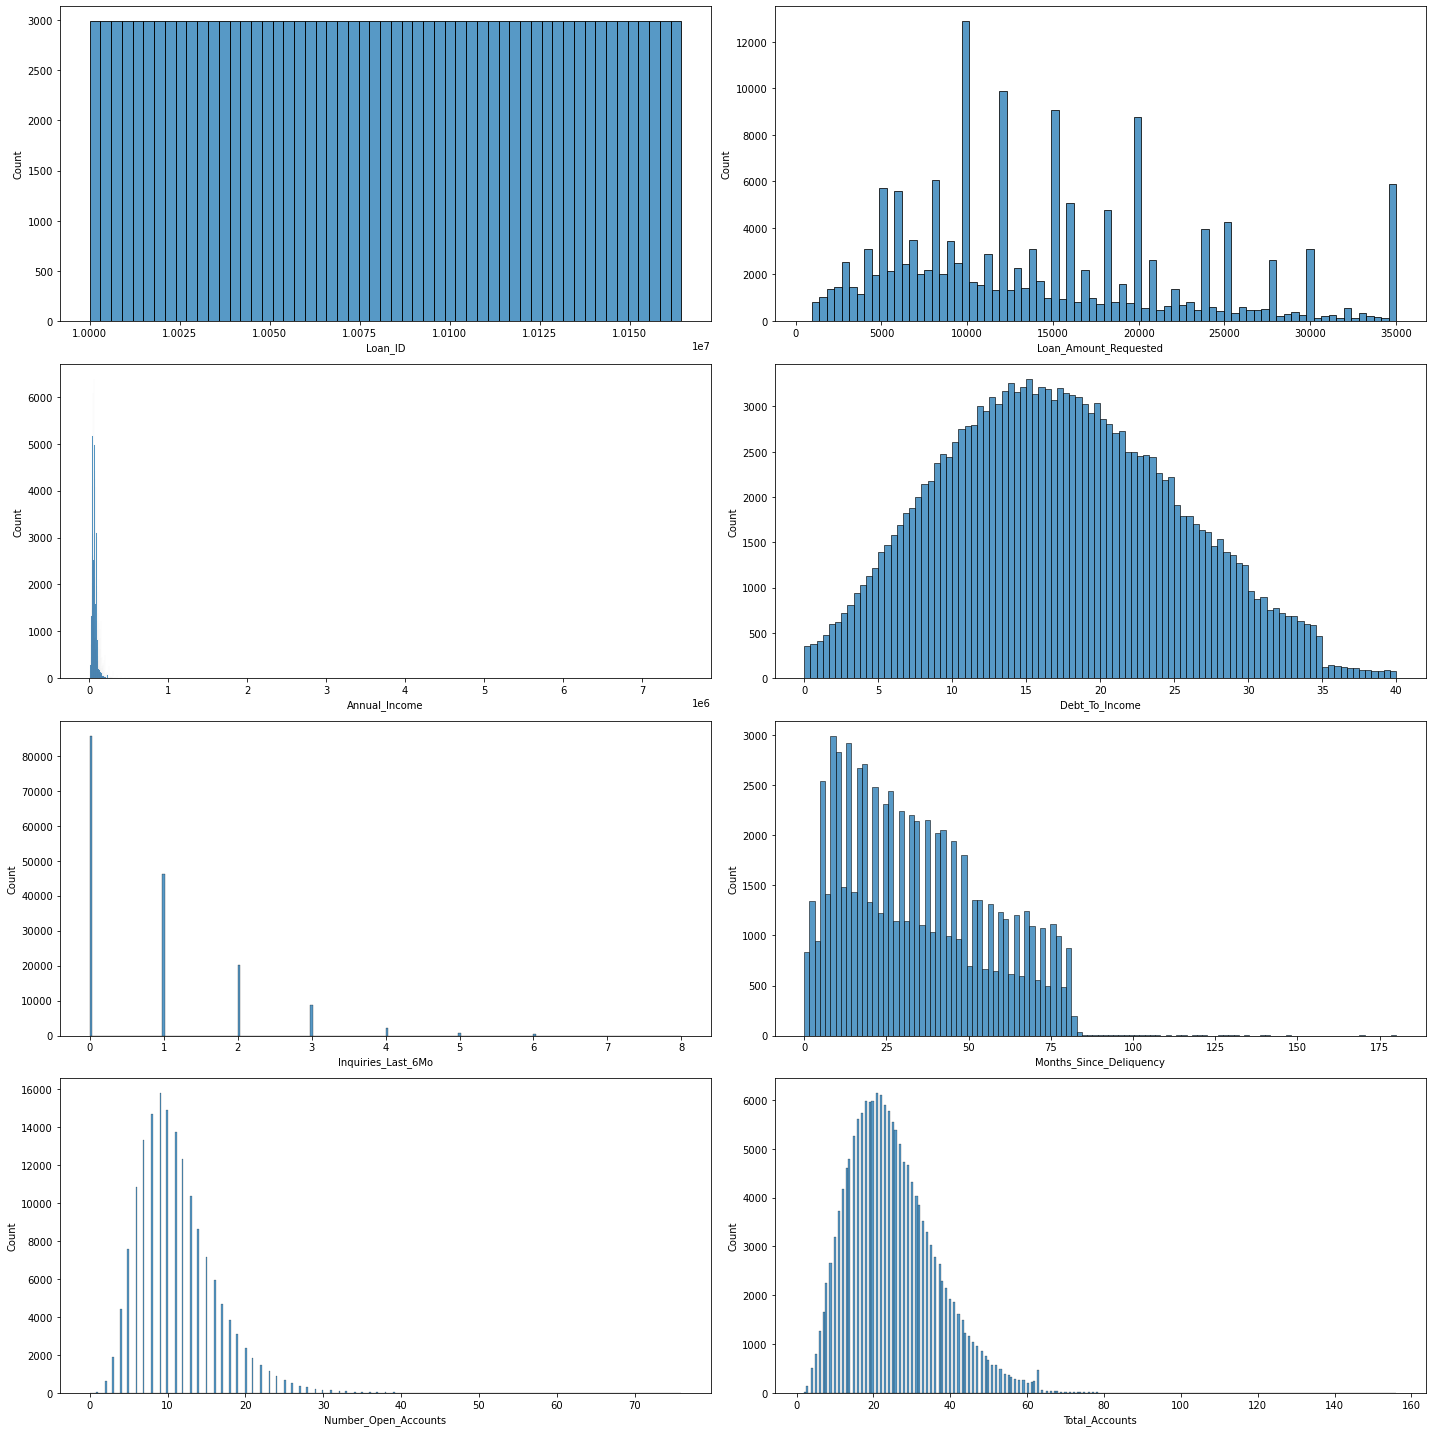

In [207]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i,a in zip(train.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.histplot(train[i],ax=a)
    plt.tight_layout()
    fig.show()

### inference - 
In this dataframe there is 8 numerical columns which are 'Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate'

# UNIVARIATE ANALYSIS for categorical variable

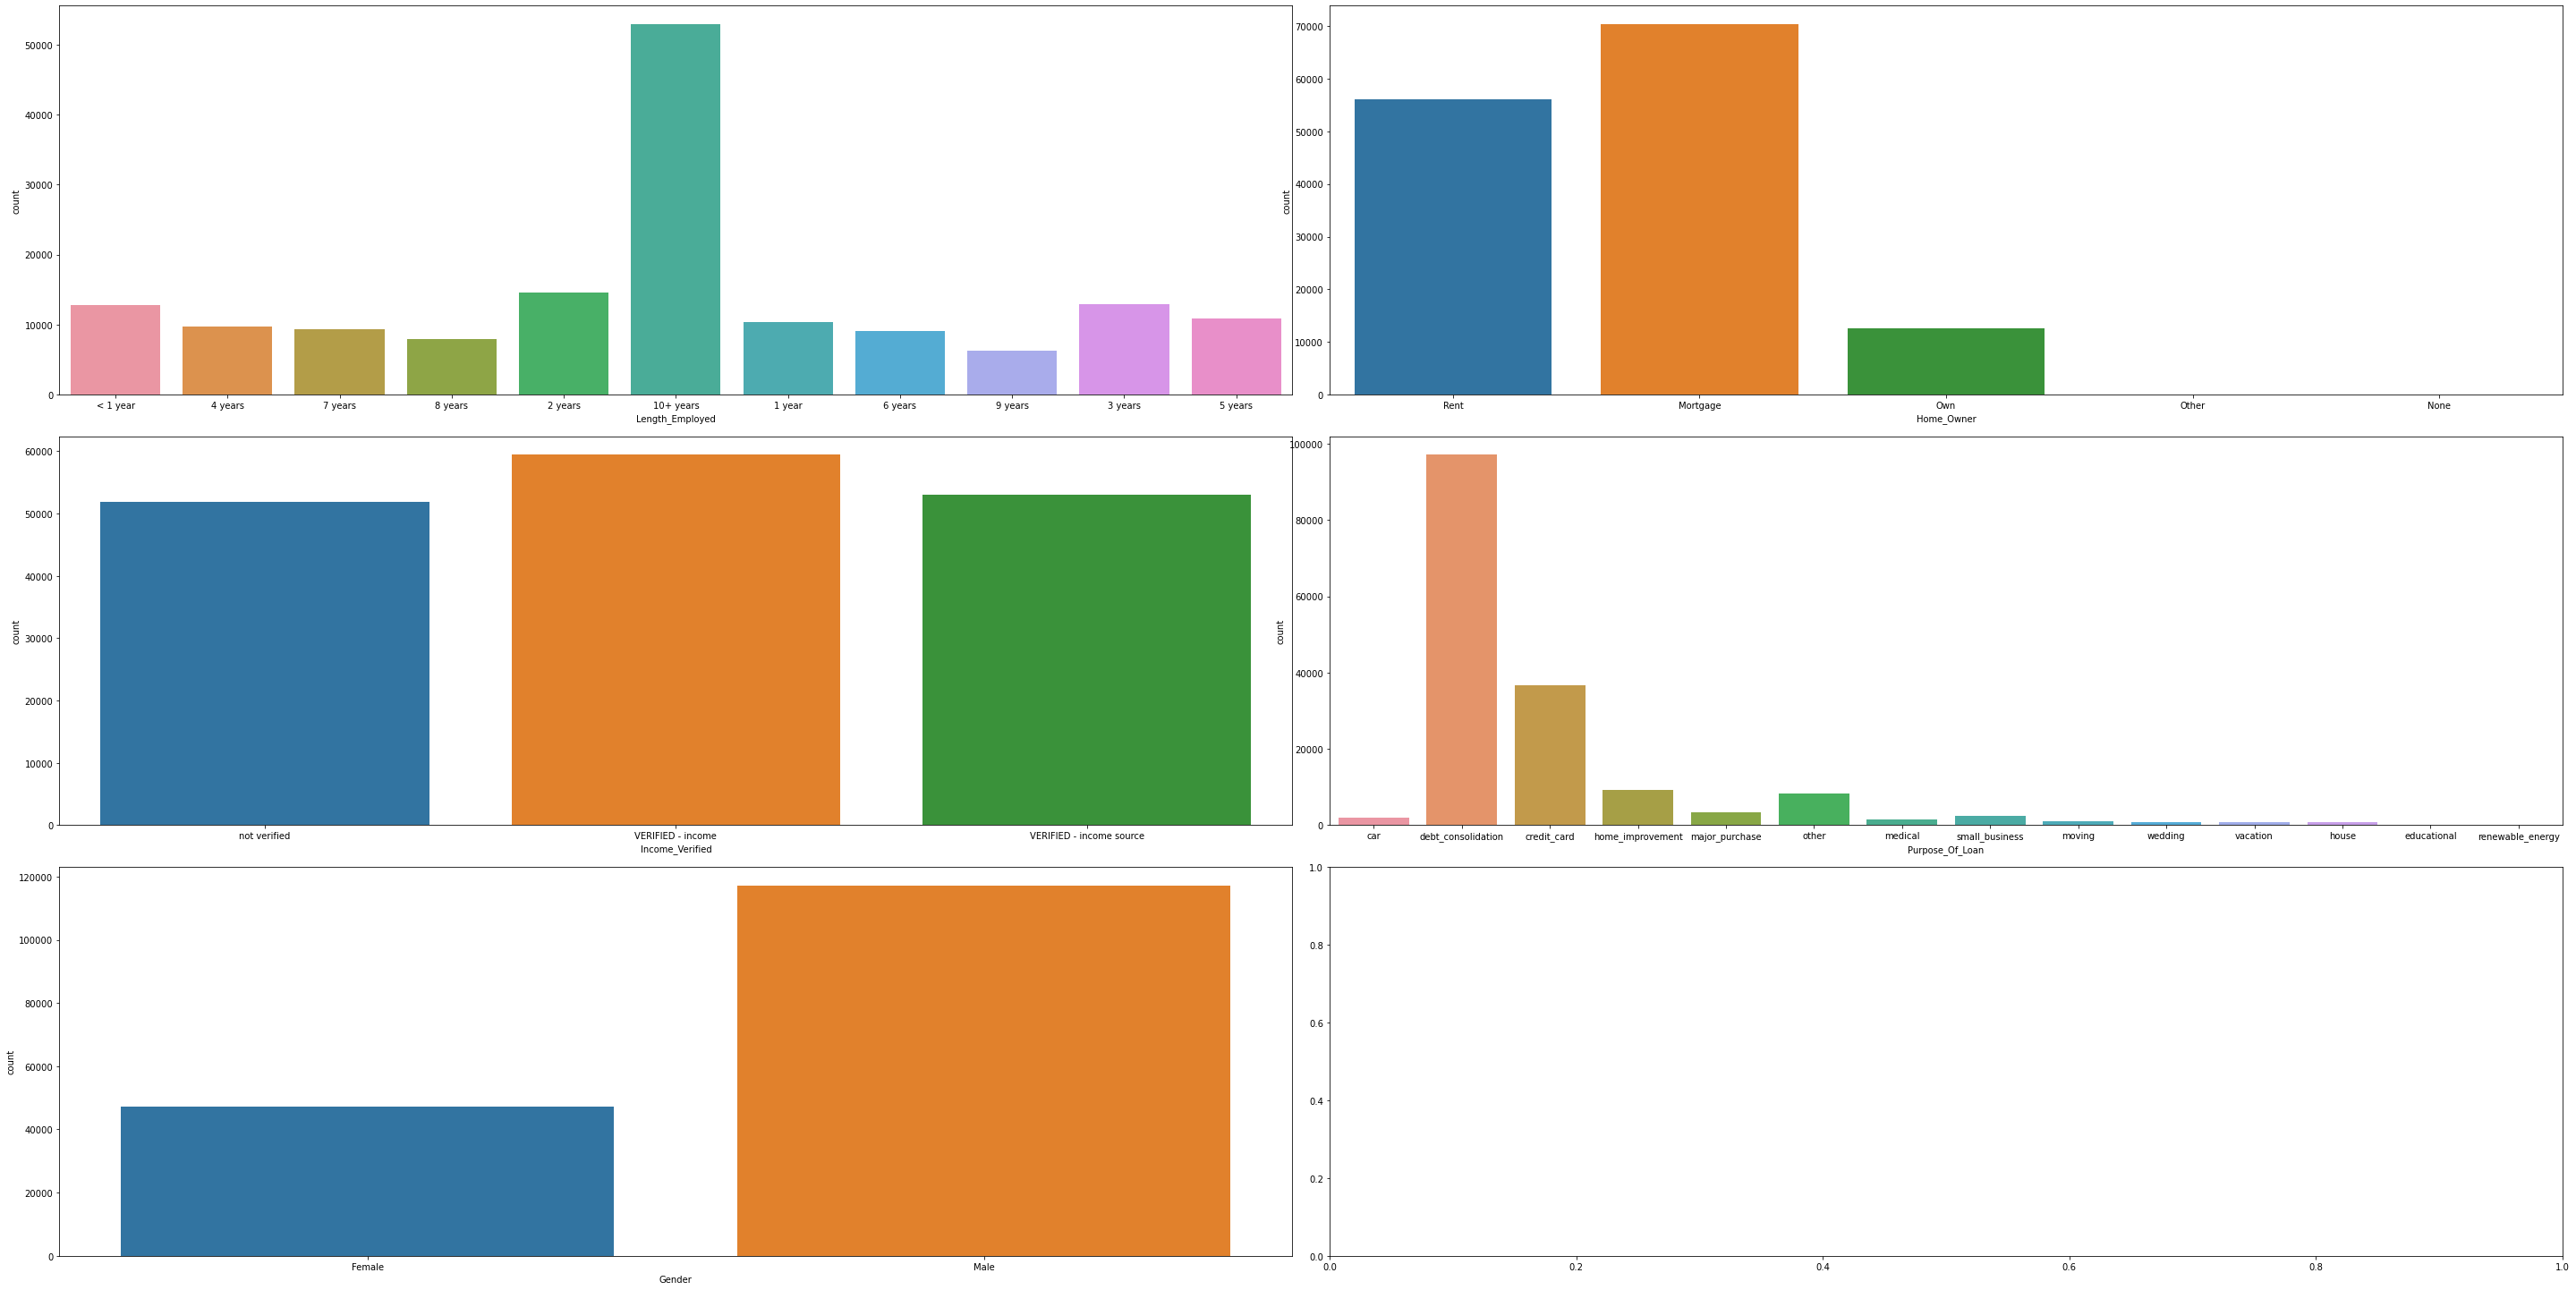

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

In [208]:
fig,ax=plt.subplots(3,2,figsize=(40,20))
for i,a in zip(train.select_dtypes(exclude=np.number).columns,ax.flatten()):
    sns.countplot(train[i],ax=a) 
    plt.tight_layout() 
    plt.figure() 

### inference - 
there are six chatagerocal variables in dataframes are 'Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan',
       'Gender', 'source' 
in Length_Employed there are 12 columns which are '< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years' and 10+ years has most
in Home_Owner there are 6 types which are 'Rent', 'Mortgage', nan, 'Own', 'Other', 'None' majority is 'Mortgage'
in Income_Verified there 4 types not verified', 'VERIFIED - income', 'VERIFIED - income source' and majority  is VERIFIED - income'
in Purpose_Of_Loan 14 types which are 'car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy' in that debt_consolidation highest weightage followed by
        credit_card and others are significant
In Gender there 2 types 'Female', 'Male' and males are dominating class
In source there are  types train test train contains train data and test contains test data

# Bivariate analysis of numeric vaiable

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Annual_Income'>

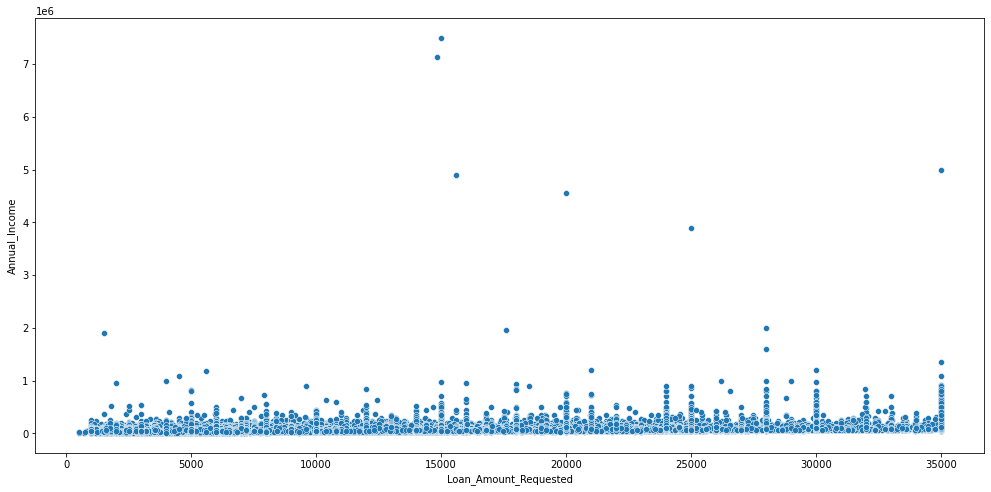

In [209]:
sns.scatterplot(train.Loan_Amount_Requested,train.Annual_Income)

### inference - 
there is no such correlation between Loan_Amount_Requested,Annual_Income

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Debt_To_Income'>

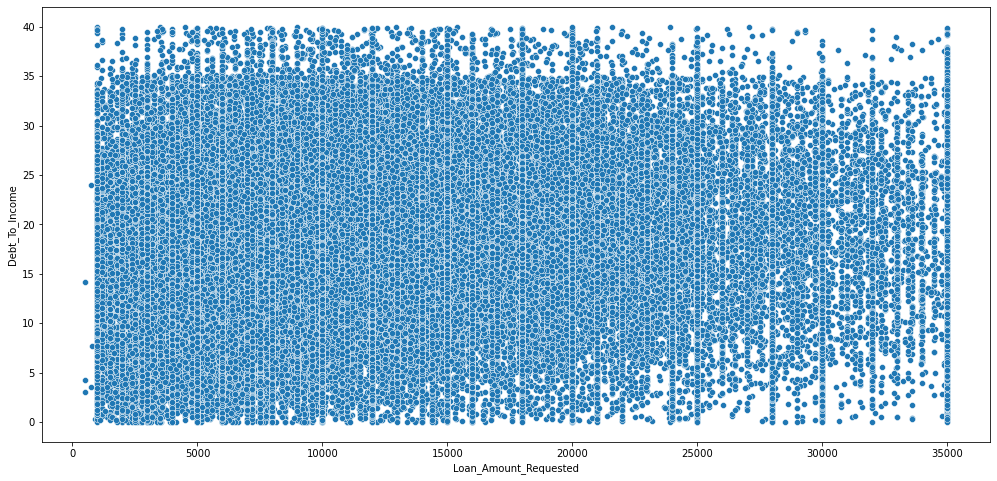

In [210]:
sns.scatterplot(train.Loan_Amount_Requested,train.Debt_To_Income)

### inference - 
there is no correlation between Loan_Amount_Requested,Debt_To_Income

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Inquiries_Last_6Mo'>

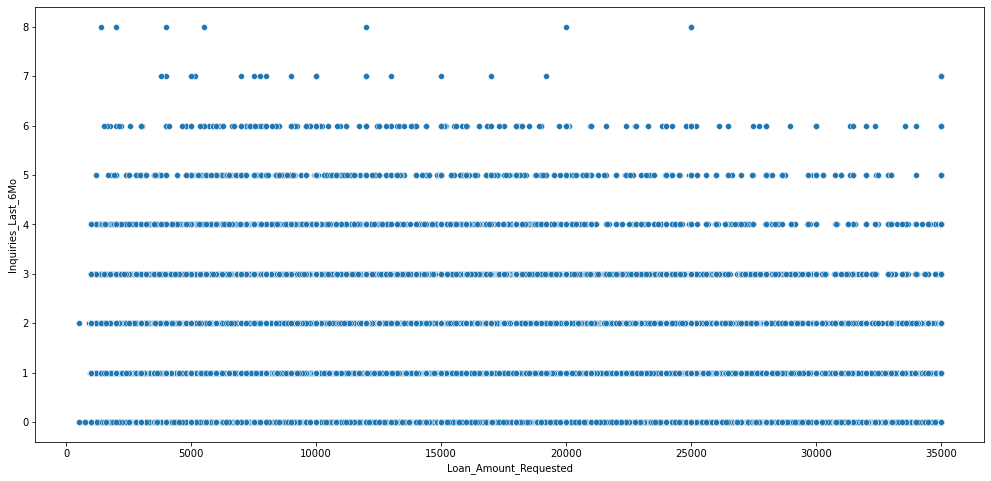

In [211]:
sns.scatterplot(train.Loan_Amount_Requested,train.Inquiries_Last_6Mo)

### inference - 
there is no correlation between Loan_Amount_Requested,Inquiries_Last_6Mo

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Months_Since_Deliquency'>

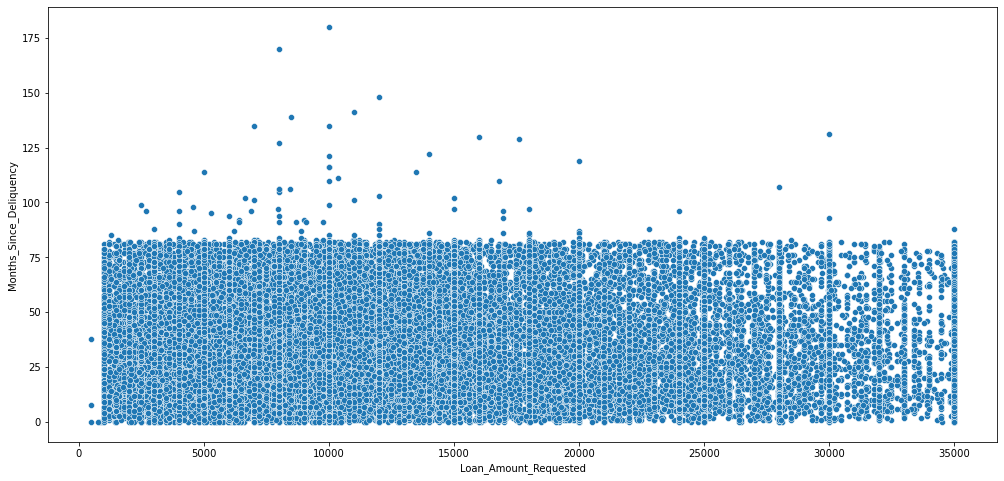

In [212]:
sns.scatterplot(train.Loan_Amount_Requested,train.Months_Since_Deliquency)

### inference - 
there is no such correlation between Loan_Amount_Requested,Months_Since_Deliquency

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Number_Open_Accounts'>

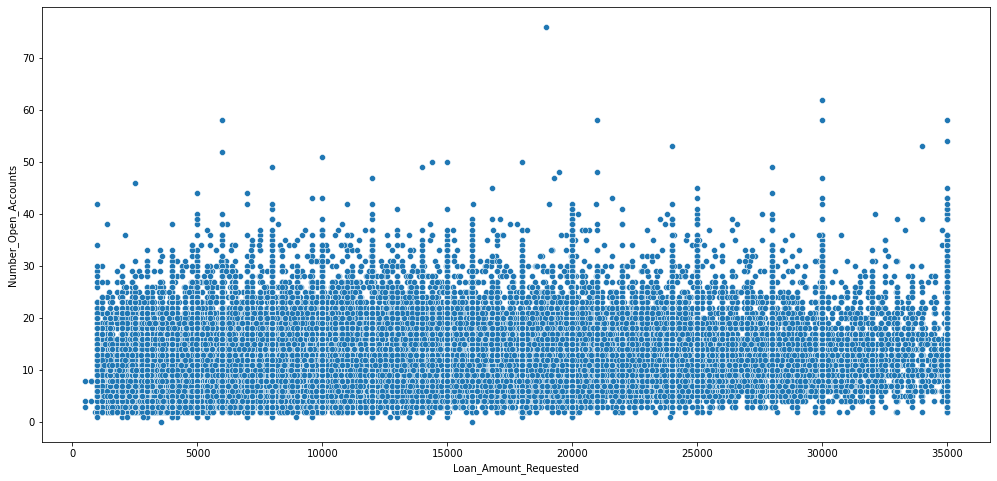

In [213]:
sns.scatterplot(train.Loan_Amount_Requested,train.Number_Open_Accounts)

### inference - 
there is no such correlation between Loan_Amount_Requested,Number_Open_Accounts

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Total_Accounts'>

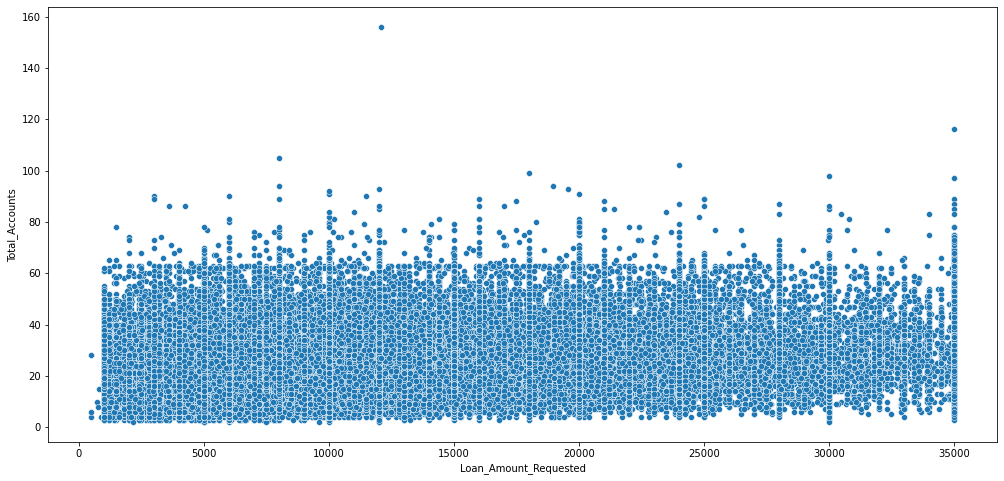

In [214]:
sns.scatterplot(train.Loan_Amount_Requested,train.Total_Accounts)

### inference - 
there is no such correlation between Loan_Amount_Requested,Total_Accounts

<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Interest_Rate'>

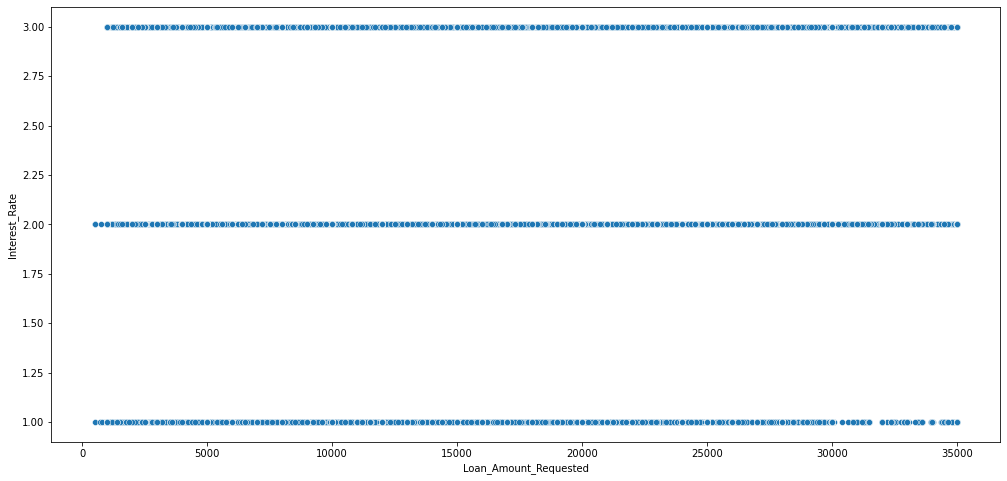

In [215]:
sns.scatterplot(train.Loan_Amount_Requested,train.Interest_Rate)

### inference - 
there is correlation between Loan_Amount_Requested,Interest_Rate

<AxesSubplot:xlabel='Annual_Income', ylabel='Debt_To_Income'>

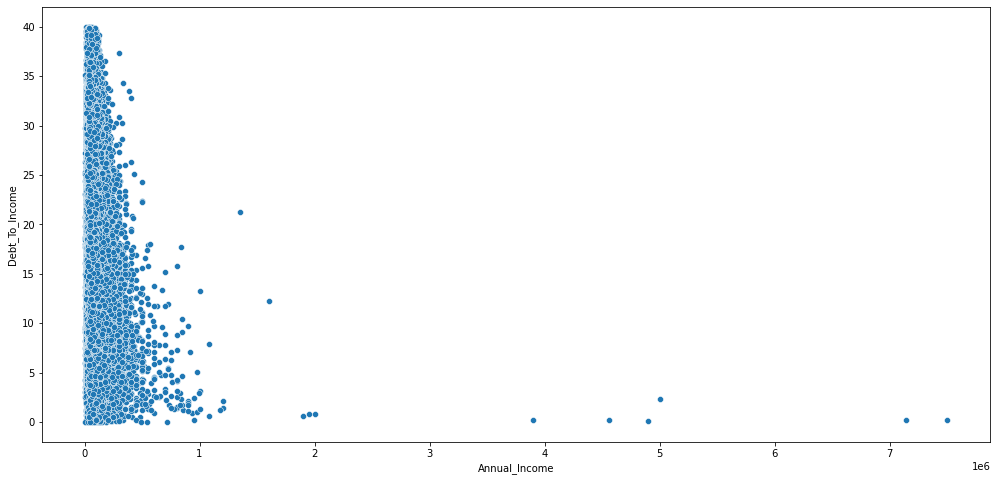

In [216]:
sns.scatterplot(train.Annual_Income,train.Debt_To_Income)

### inference - 
there is no such correlation between Annual_Income,Debt_To_Income

<AxesSubplot:xlabel='Annual_Income', ylabel='Inquiries_Last_6Mo'>

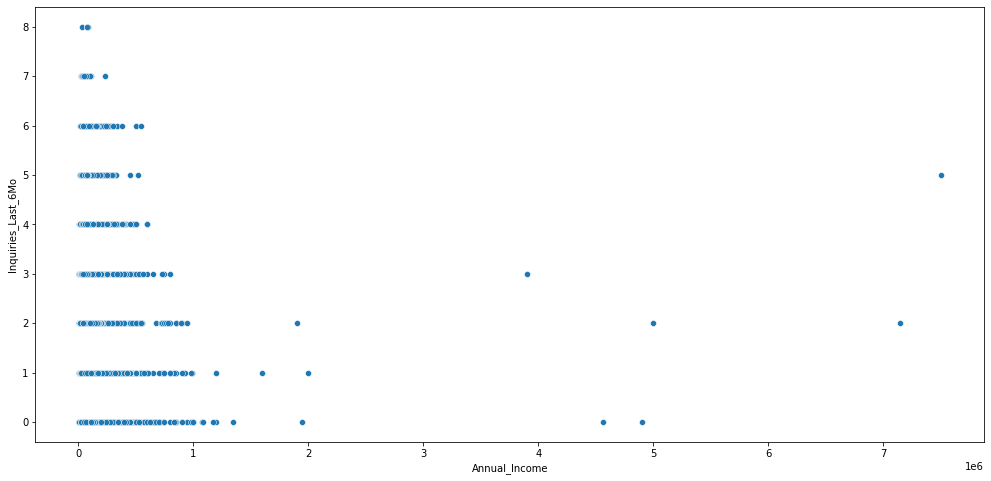

In [217]:
sns.scatterplot(train.Annual_Income,train.Inquiries_Last_6Mo)

### inference - 
there is no such correlation between Annual_Income,Inquiries_Last_6Mo

<AxesSubplot:xlabel='Annual_Income', ylabel='Months_Since_Deliquency'>

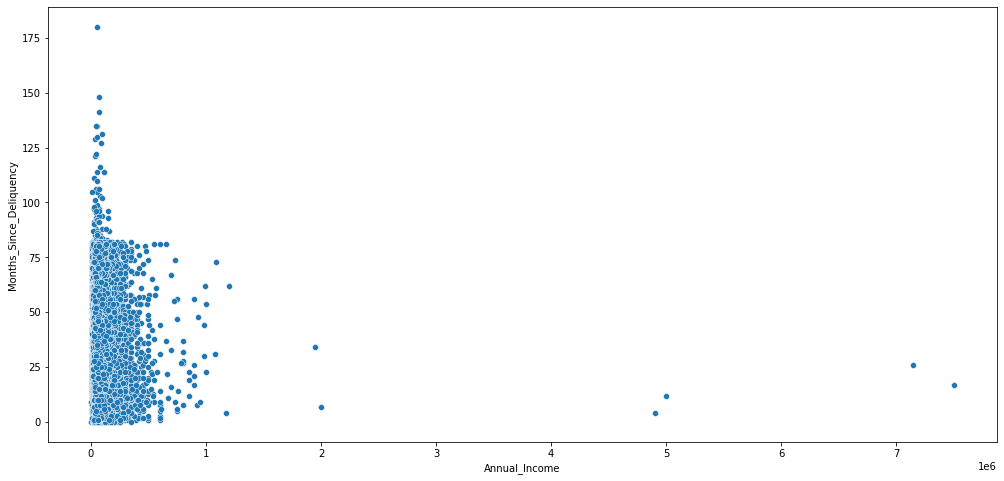

In [218]:
sns.scatterplot(train.Annual_Income,train.Months_Since_Deliquency)

### inference - 
there is no such correlation between Annual_Income,Months_Since_Deliquency

<AxesSubplot:xlabel='Annual_Income', ylabel='Number_Open_Accounts'>

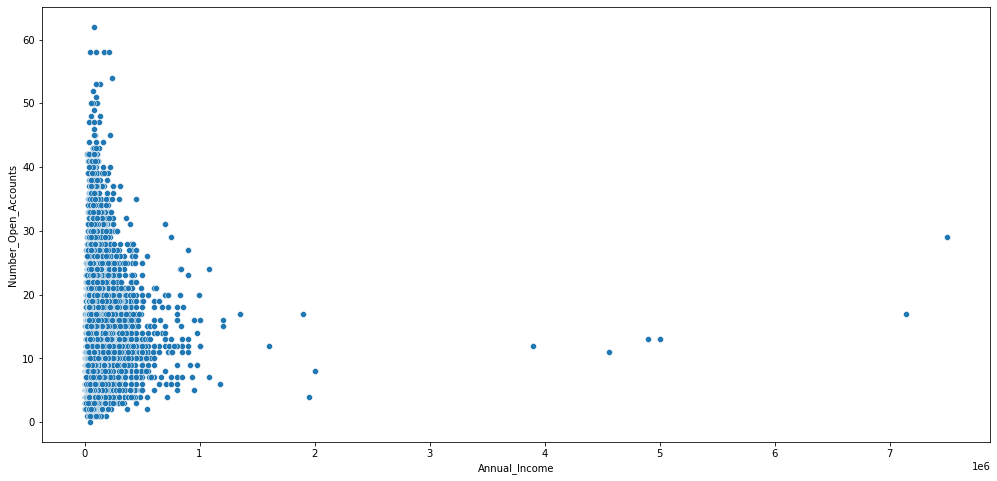

In [219]:
sns.scatterplot(train.Annual_Income,train.Number_Open_Accounts)

### inference - 
there is slightly positive correlation between Annual_Income,Number_Open_Accounts

<AxesSubplot:xlabel='Annual_Income', ylabel='Total_Accounts'>

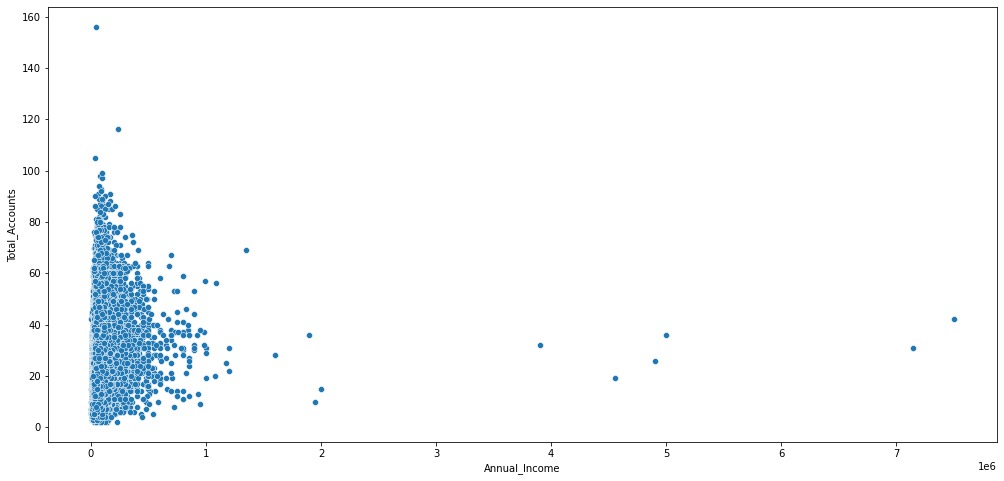

In [220]:
sns.scatterplot(train.Annual_Income,train.Total_Accounts)

### inference - 
there is slightly positive correlation between Annual_Income,Total_Accounts

<AxesSubplot:xlabel='Annual_Income', ylabel='Interest_Rate'>

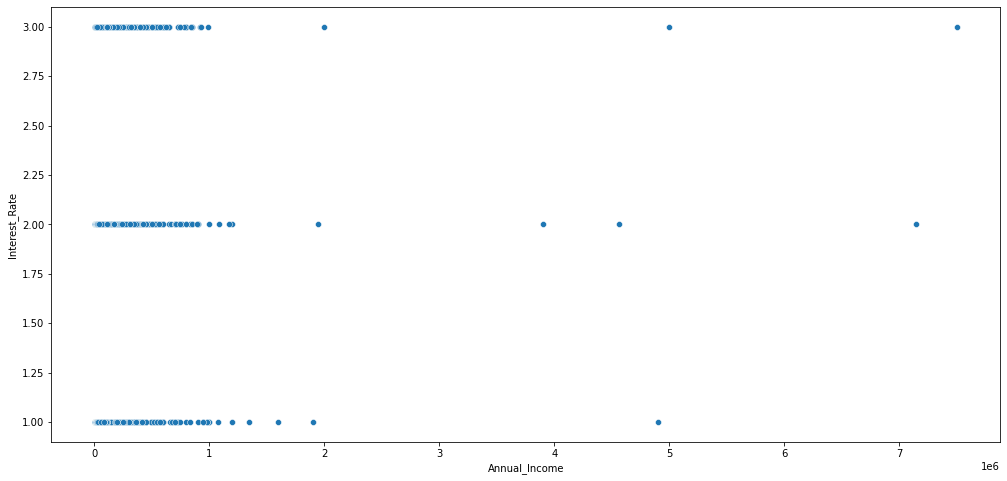

In [223]:
sns.scatterplot(train.Annual_Income,train.Interest_Rate)

### inference - 
there is no correlation between Debt_To_Income,Interest_Rate

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Inquiries_Last_6Mo'>

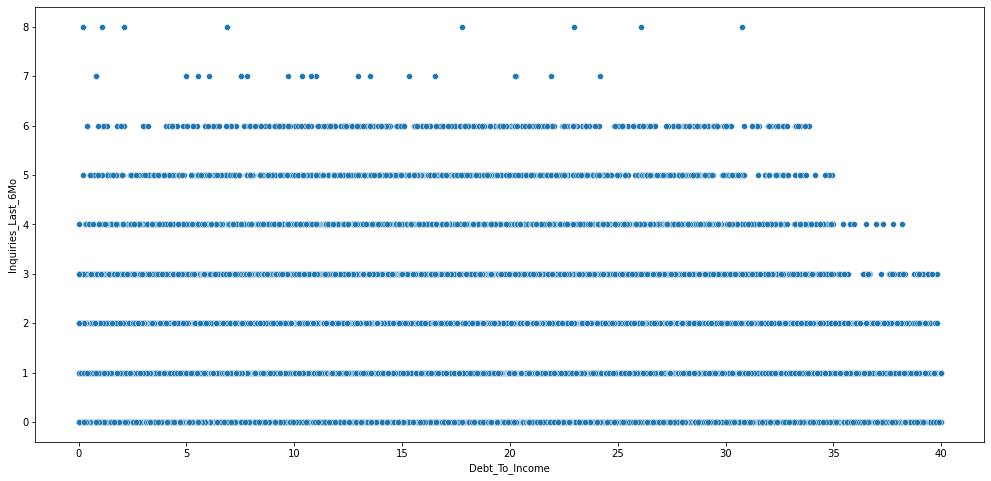

In [224]:
sns.scatterplot(train.Debt_To_Income,train.Inquiries_Last_6Mo)

### inference - 
there is no correlation between Debt_To_Income,Inquiries_Last_6Mo

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Months_Since_Deliquency'>

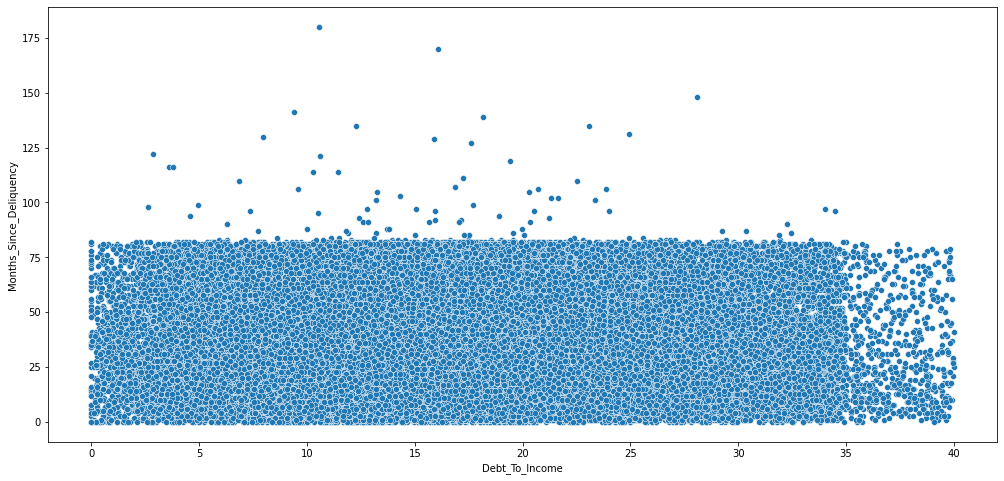

In [225]:
sns.scatterplot(train.Debt_To_Income,train.Months_Since_Deliquency)

### inference - 
there is no correlation between Debt_To_Income and Months_Since_Deliquency

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Number_Open_Accounts'>

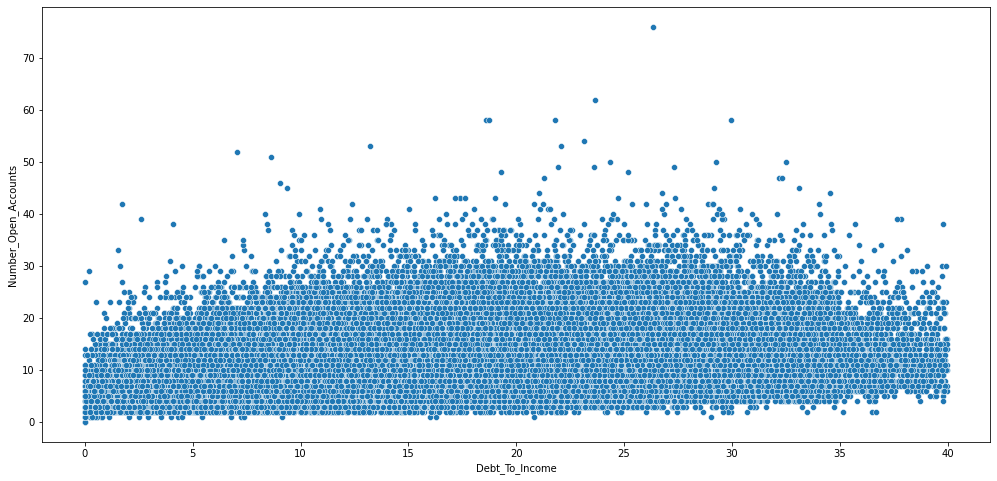

In [226]:
sns.scatterplot(train.Debt_To_Income,train.Number_Open_Accounts)

### inference - 
there is no correlation between Debt_To_Income and Number_Open_Accounts

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Total_Accounts'>

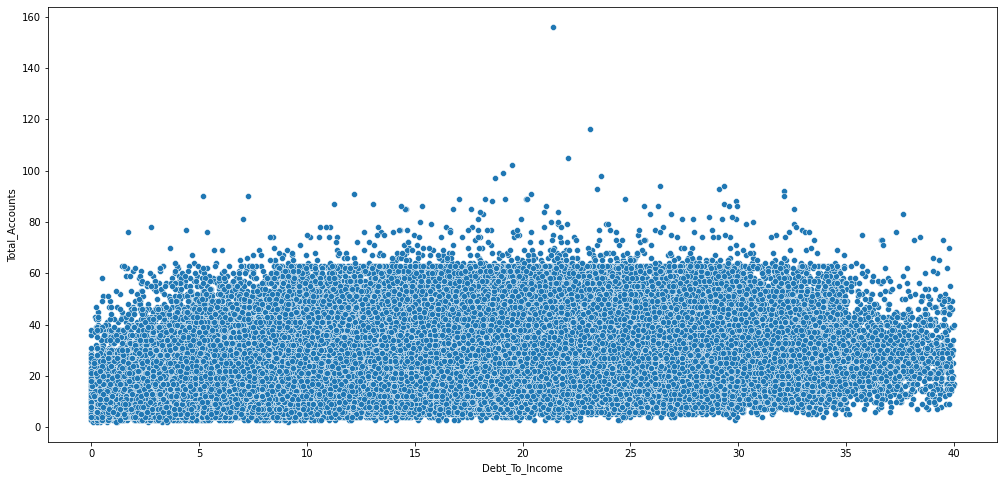

In [227]:
sns.scatterplot(train.Debt_To_Income,train.Total_Accounts)

### inference - 
there is no correlation between Inquiries_Last_6Mo and Months_Since_Deliquency

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Interest_Rate'>

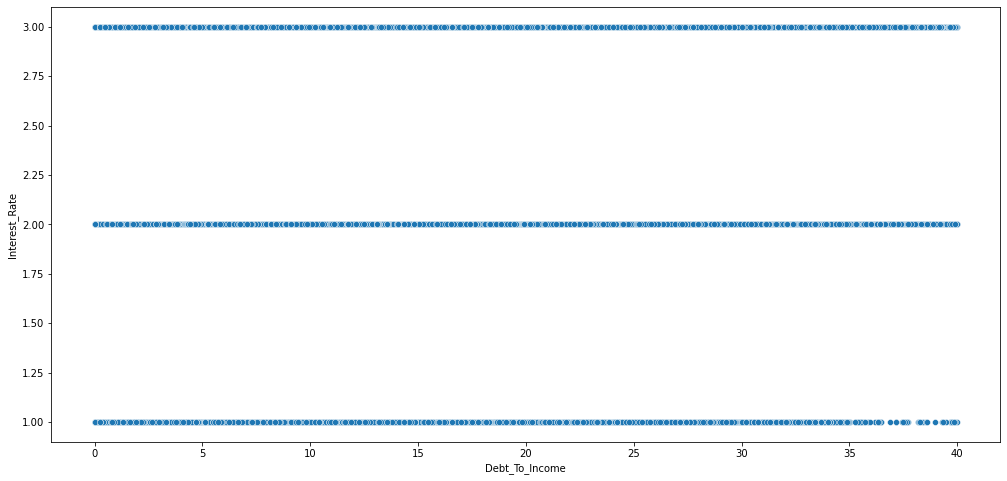

In [228]:
sns.scatterplot(train.Debt_To_Income,train.Interest_Rate)

### inference - 
there is no corelation between intreast rate and debt to income

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Months_Since_Deliquency'>

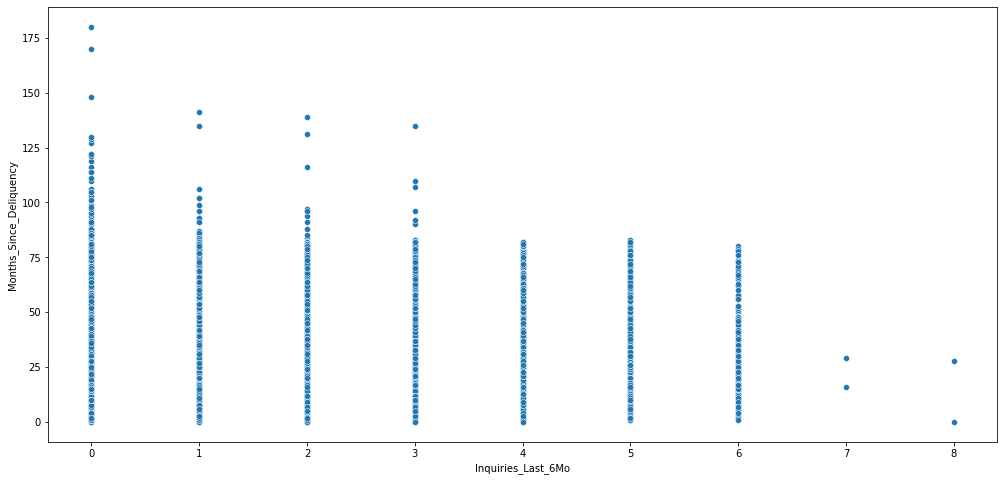

In [229]:
sns.scatterplot(train.Inquiries_Last_6Mo,train.Months_Since_Deliquency)

### inference - 
there is correlation between Inquiries_Last_6Mo and Months_Since_Deliquency

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Total_Accounts'>

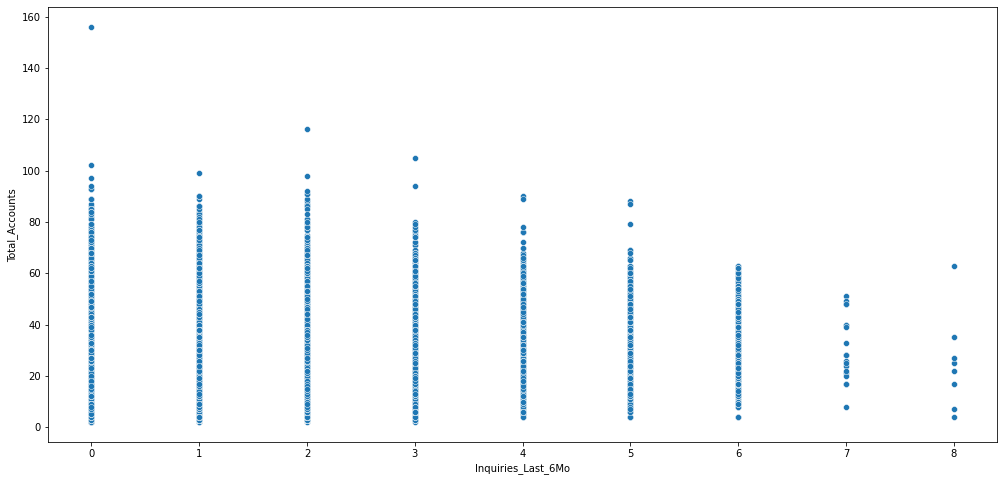

In [230]:
sns.scatterplot(train.Inquiries_Last_6Mo,train.Total_Accounts)

### inference - 
there is no correlation between Inquiries_Last_6Mo and Total_Accounts

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Number_Open_Accounts'>

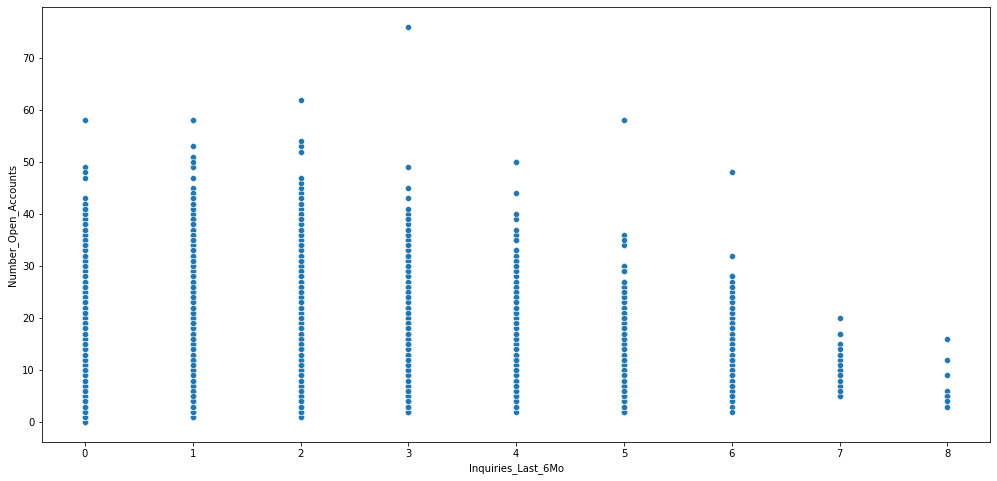

In [231]:
sns.scatterplot(train.Inquiries_Last_6Mo,train.Number_Open_Accounts)

### inference - 
there is no correlation between Inquiries_Last_6Mo and Number_Open_Accounts

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Interest_Rate'>

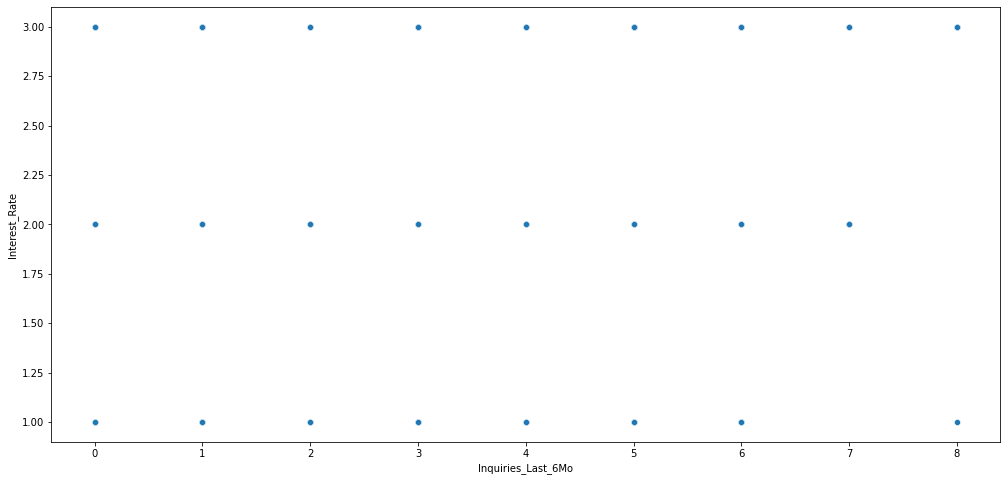

In [232]:
sns.scatterplot(train.Inquiries_Last_6Mo,train.Interest_Rate)

### inference - 
there is no correlation between Inquiries_Last_6Mo and Interest_Rate

<AxesSubplot:xlabel='Months_Since_Deliquency', ylabel='Total_Accounts'>

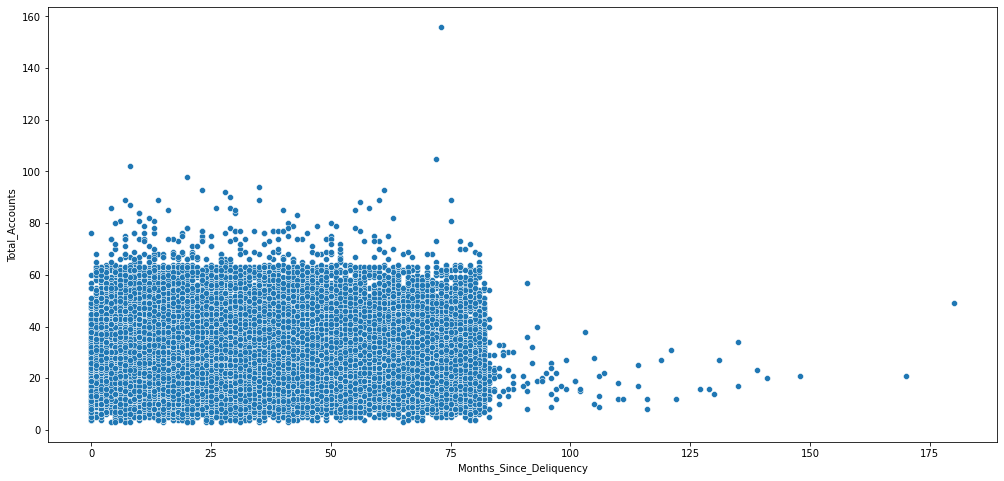

In [233]:
sns.scatterplot(train.Months_Since_Deliquency,train.Total_Accounts)

### inference - 
there is no such correlation between Months_Since_Deliquency and Total_Accounts

<AxesSubplot:xlabel='Months_Since_Deliquency', ylabel='Number_Open_Accounts'>

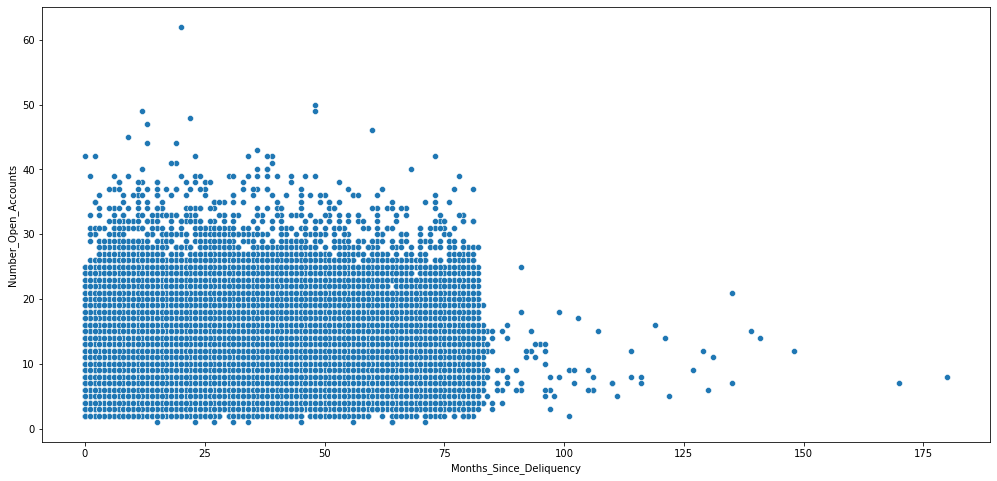

In [234]:
sns.scatterplot(train.Months_Since_Deliquency,train.Number_Open_Accounts)

### inference - 
there is no such correlation between Months_Since_Deliquency and Number_Open_Accounts

<AxesSubplot:xlabel='Months_Since_Deliquency', ylabel='Interest_Rate'>

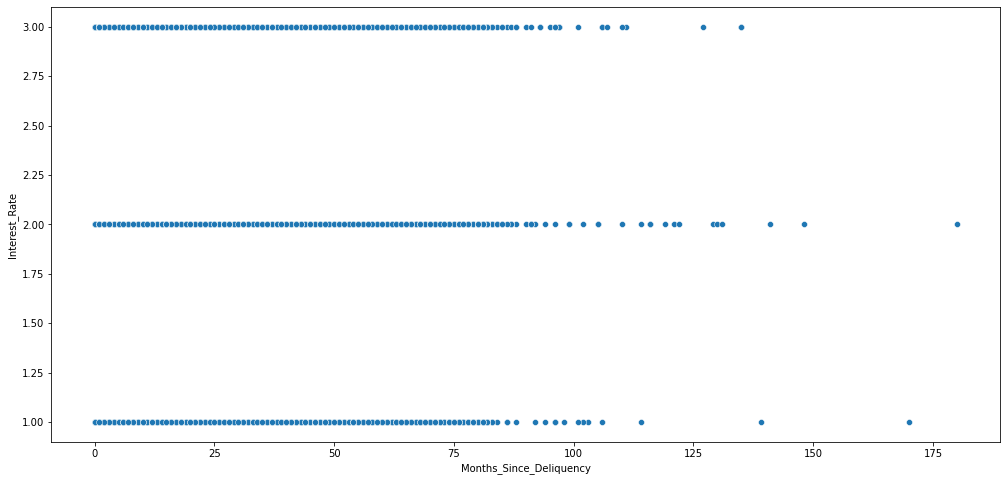

In [235]:
sns.scatterplot(train.Months_Since_Deliquency,train.Interest_Rate)

### inference - 
there is no correlation between Months_Since_Deliquency and Interest_Rate

<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Interest_Rate'>

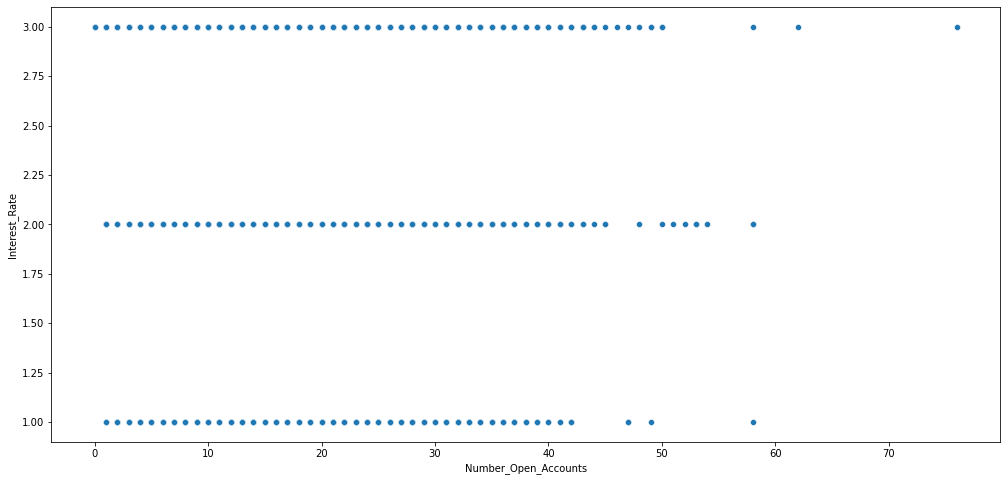

In [236]:
sns.scatterplot(train.Number_Open_Accounts,train.Interest_Rate)

### inference - 
there is no correlation between Number_Open_Accounts and Interest_Rate

<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Total_Accounts'>

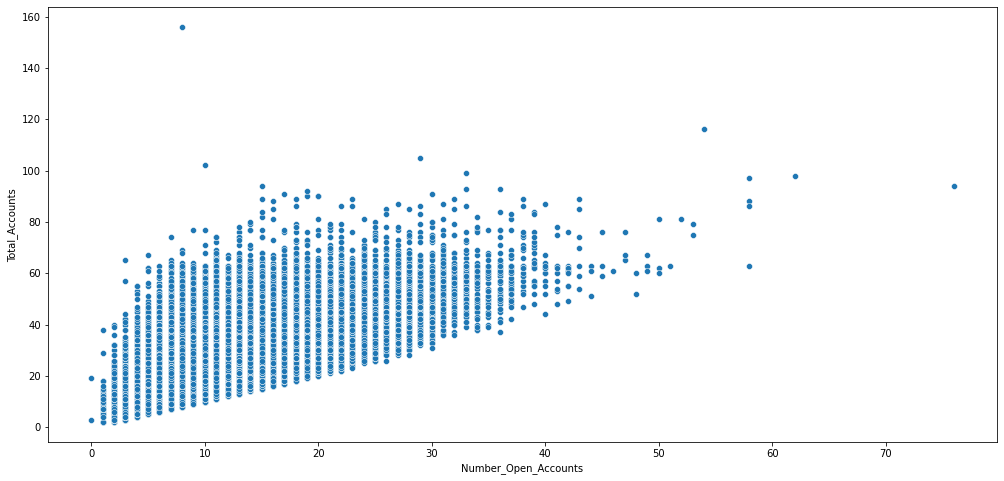

In [237]:
sns.scatterplot(train.Number_Open_Accounts,train.Total_Accounts)

### inference - 
there is a positive correlation between Number_Open_Accounts and Total_Accounts

<AxesSubplot:xlabel='Total_Accounts', ylabel='Interest_Rate'>

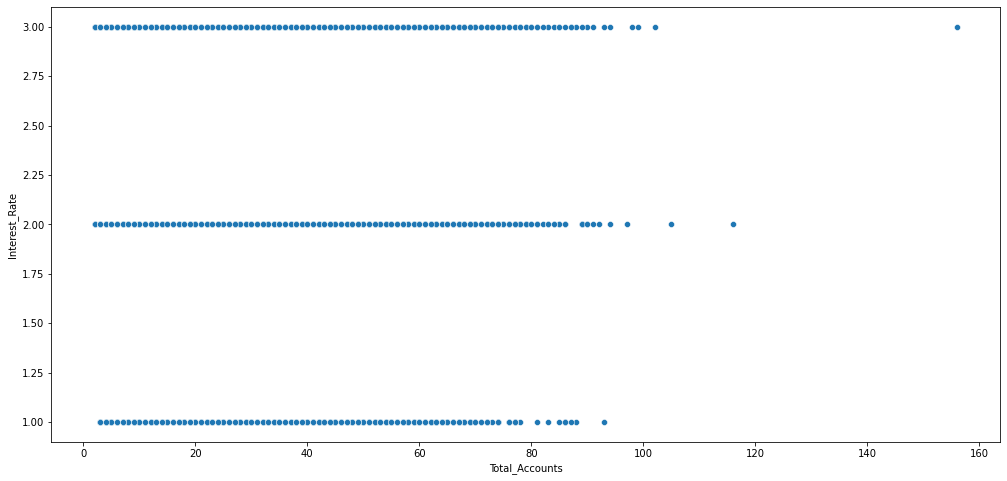

In [238]:
sns.scatterplot(train.Total_Accounts,train.Interest_Rate)

### inference - 
there is a no correlation between intreast rate and total accounts

# Bivariate analysis of Categorical vaiable

<AxesSubplot:xlabel='Length_Employed'>

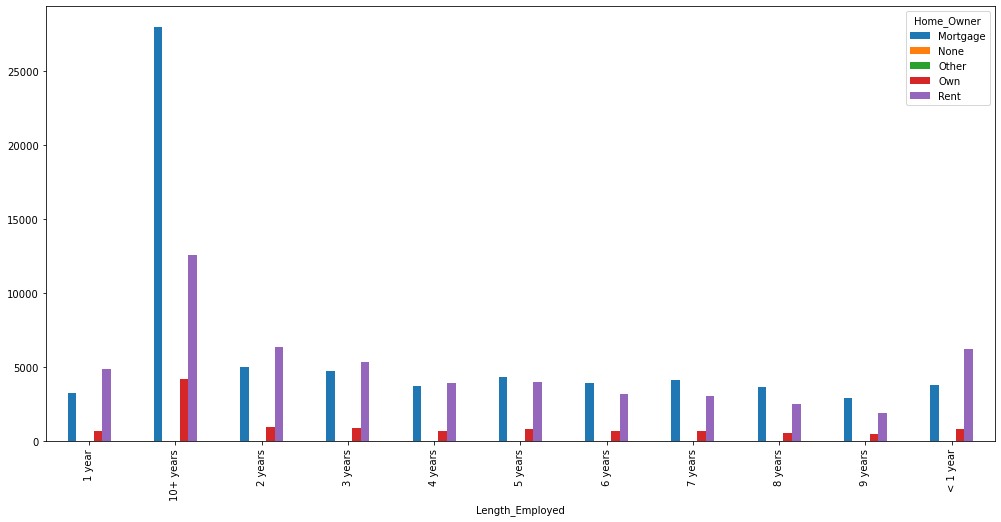

In [239]:
pd.crosstab(train.Length_Employed,train.Home_Owner).plot(kind='bar')

### inference - 
10 + year has clearly dominating class where mortagage has highest share 

<AxesSubplot:xlabel='Length_Employed'>

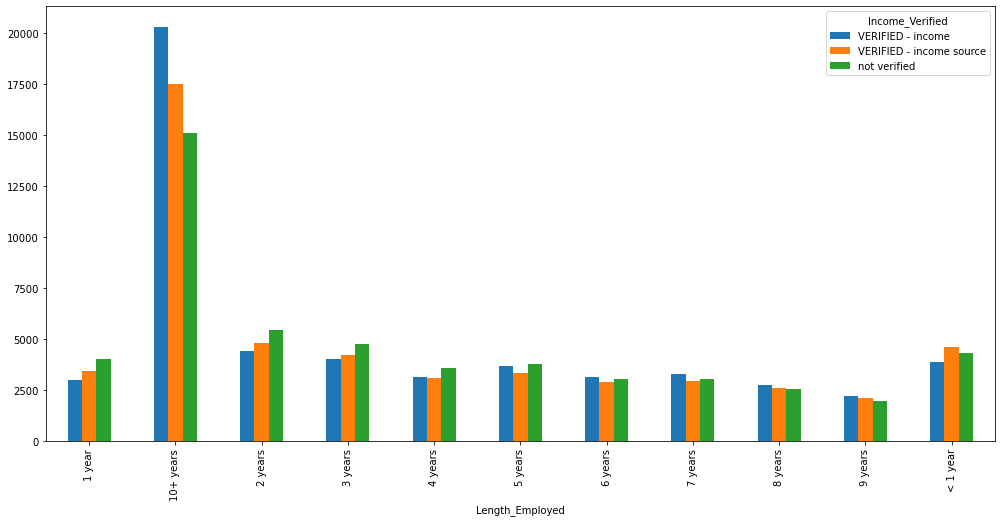

In [240]:
pd.crosstab(train.Length_Employed,train.Income_Verified).plot(kind='bar')

### inference - 
10+ year is dominating class where veified has majority

<AxesSubplot:xlabel='Length_Employed'>

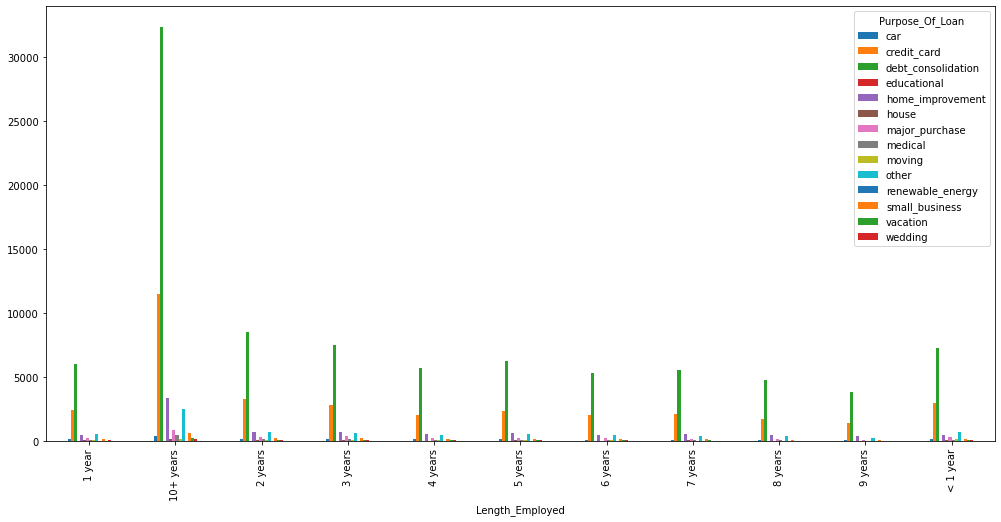

In [241]:
pd.crosstab(train.Length_Employed,train.Purpose_Of_Loan).plot(kind='bar')

### inference - 
10+ years dominating length employed where debt_consolidation has mjority

<AxesSubplot:xlabel='Length_Employed'>

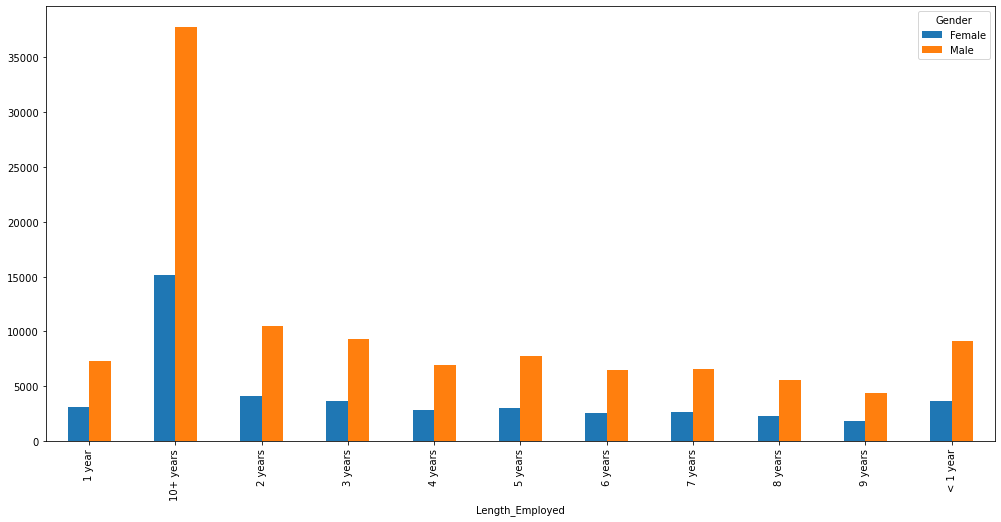

In [242]:
pd.crosstab(train.Length_Employed,train.Gender).plot(kind='bar')

### inference - 
here 10+ years of experiance clearly dominating class and males are majority in that class

<AxesSubplot:xlabel='Home_Owner'>

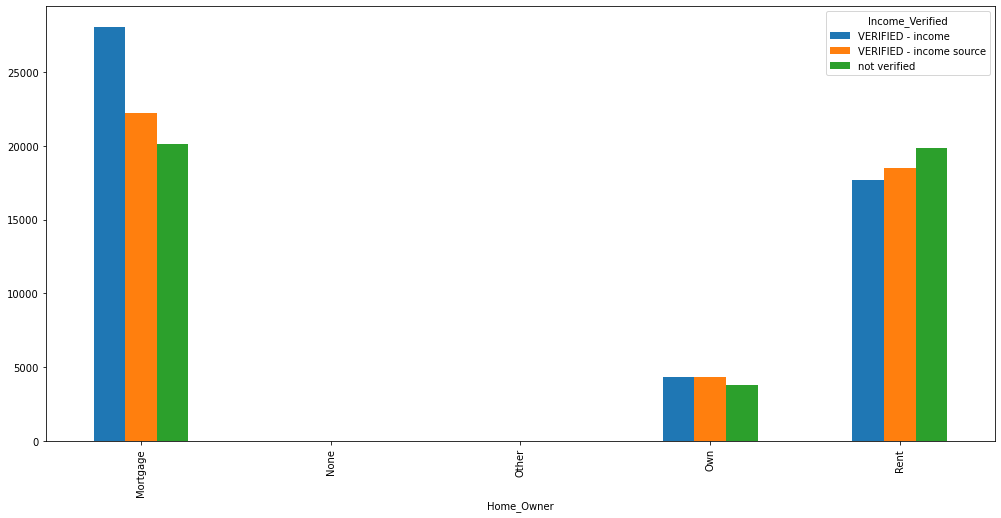

In [243]:
pd.crosstab(train.Home_Owner,train.Income_Verified).plot(kind='bar')

### inference - 
mortage has highest weightage in that verified has majority followed by rent then own and none and other are significant 

<AxesSubplot:xlabel='Home_Owner'>

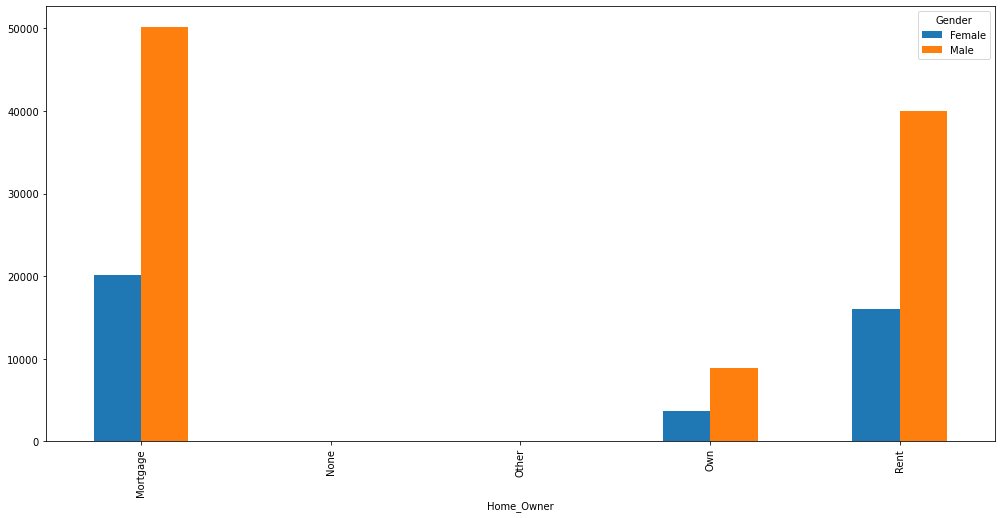

In [244]:
pd.crosstab(train.Home_Owner,train.Gender).plot(kind='bar')

### inference - 
mortage has majority and males are dominating 

<AxesSubplot:xlabel='Income_Verified'>

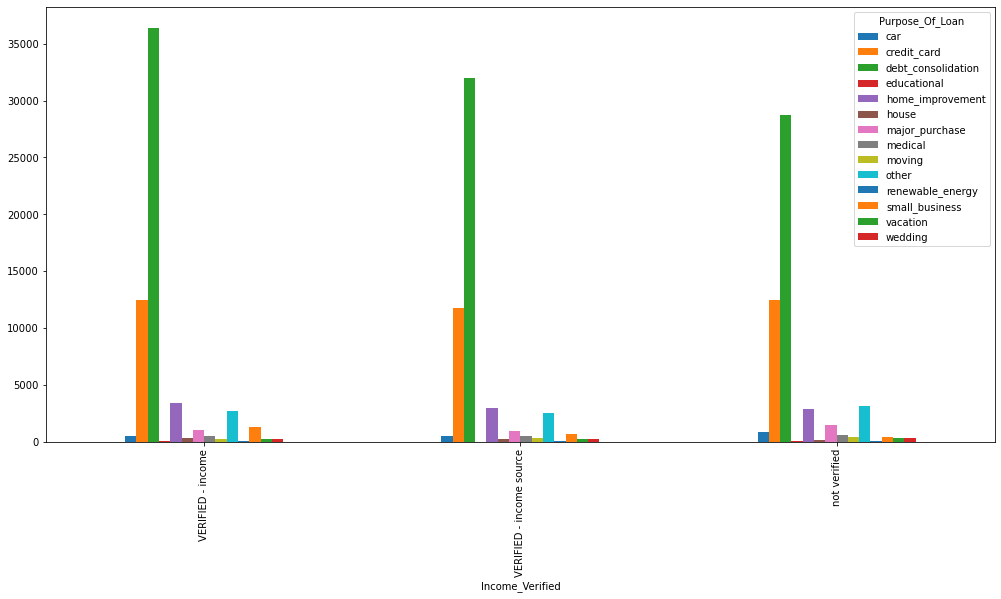

In [245]:
pd.crosstab(train.Income_Verified,train.Purpose_Of_Loan).plot(kind='bar')

### inference - 
Income verified has more wightage and inthat debt consolidation has majority and debt consolidation has majority in all 3 verified case

<AxesSubplot:xlabel='Income_Verified'>

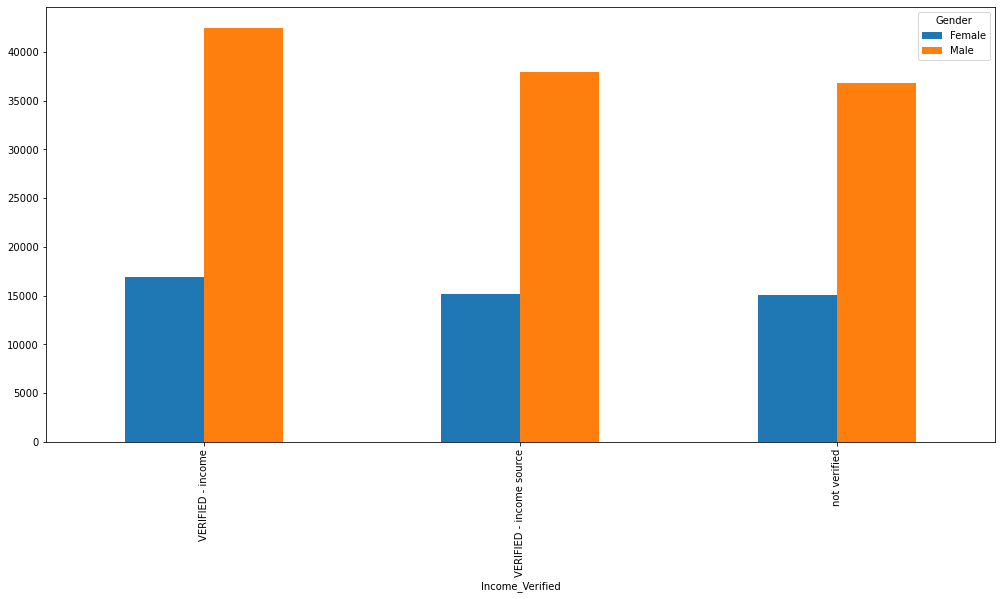

In [246]:
pd.crosstab(train.Income_Verified,train.Gender).plot(kind='bar')

### inference - 
verified income has more weightage and males have majority

<AxesSubplot:xlabel='Purpose_Of_Loan'>

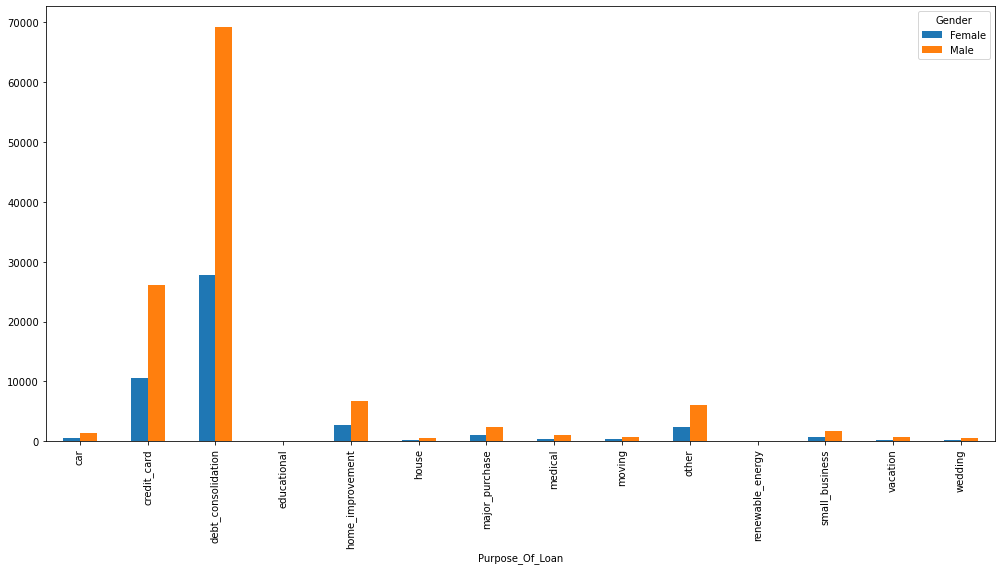

In [247]:
pd.crosstab(train.Purpose_Of_Loan,train.Gender).plot(kind='bar')

### inference - 
Debt consolidation is major criteria in debt consolidation and male has major shaare in it followed by card and others are significant

# Bivariate Analysis

<AxesSubplot:xlabel='Length_Employed'>

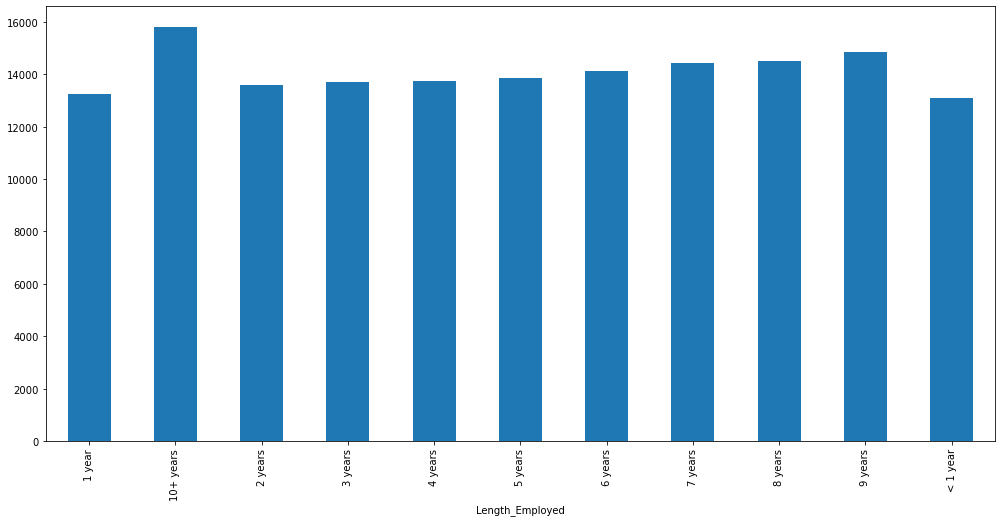

In [248]:
train.groupby('Length_Employed')['Loan_Amount_Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

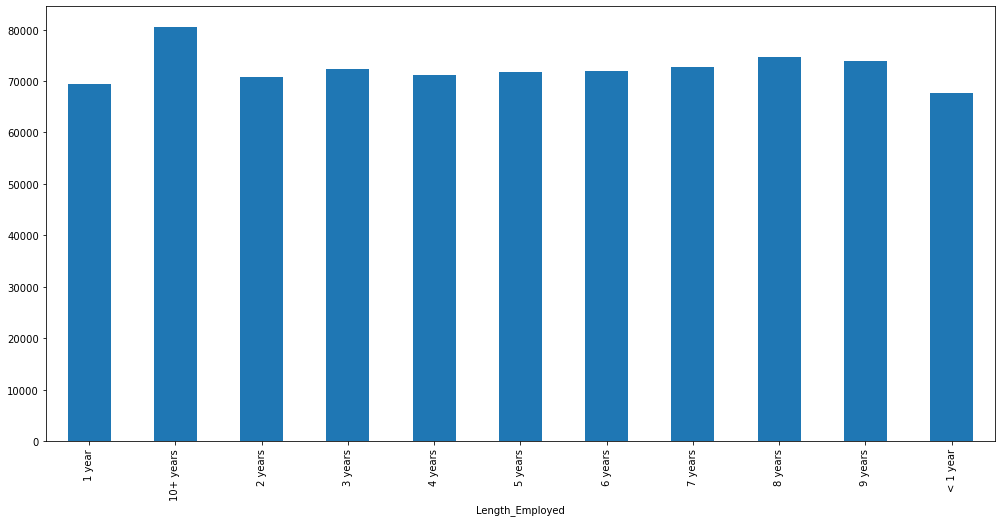

In [249]:
train.groupby('Length_Employed')['Annual_Income'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

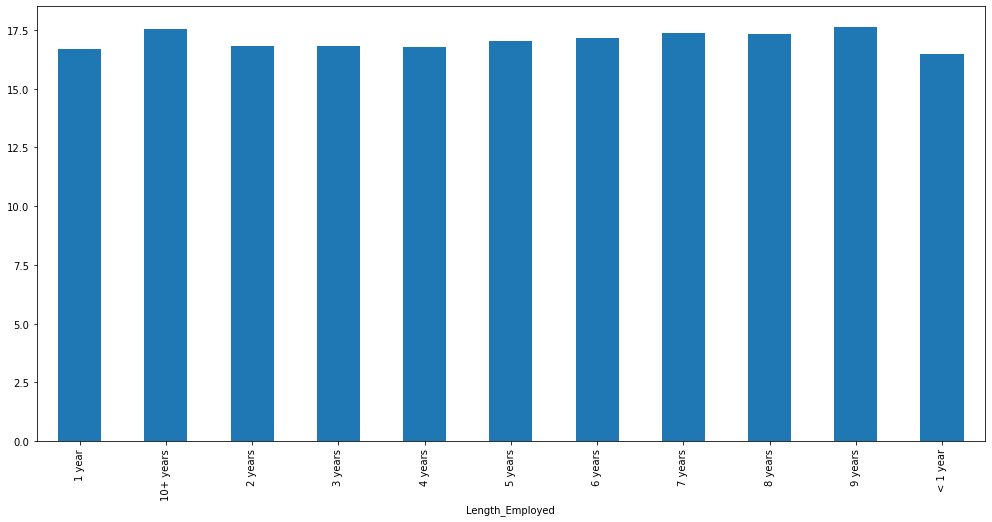

In [250]:
train.groupby('Length_Employed')['Debt_To_Income'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

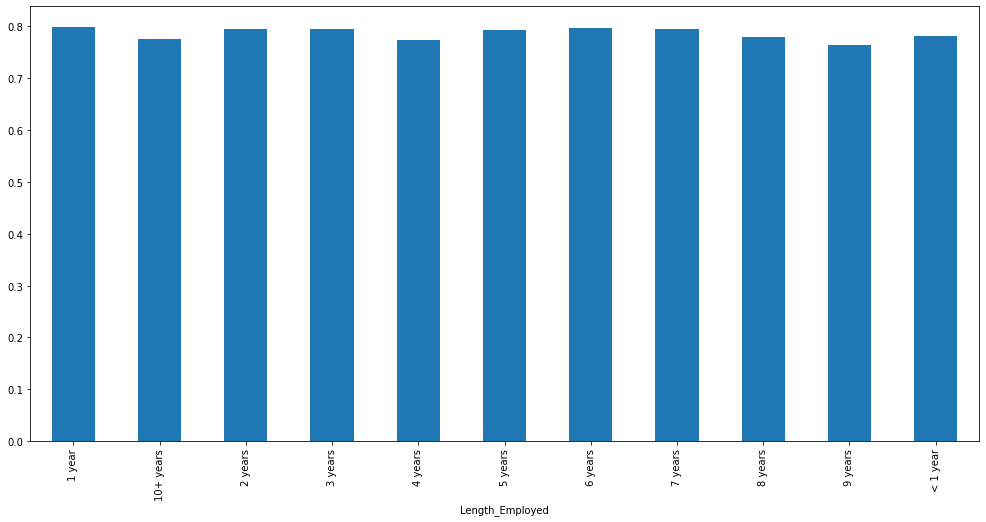

In [251]:
train.groupby('Length_Employed')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

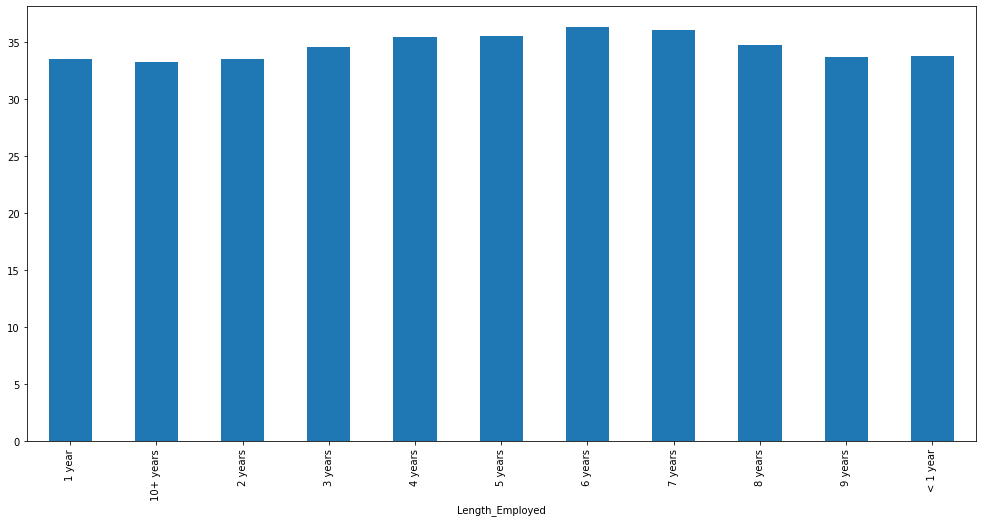

In [252]:
train.groupby('Length_Employed')['Months_Since_Deliquency'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

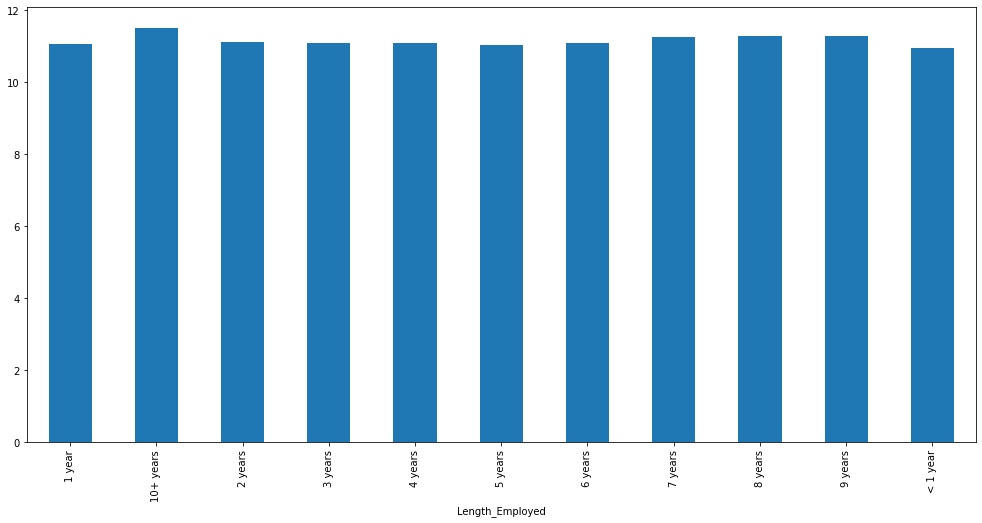

In [253]:
train.groupby('Length_Employed')['Number_Open_Accounts'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

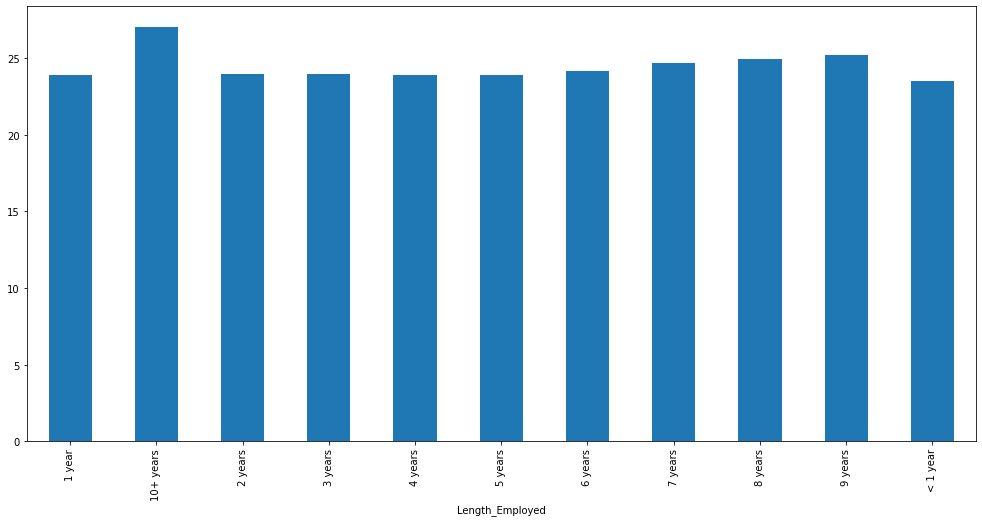

In [254]:
train.groupby('Length_Employed')['Total_Accounts'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Length_Employed'>

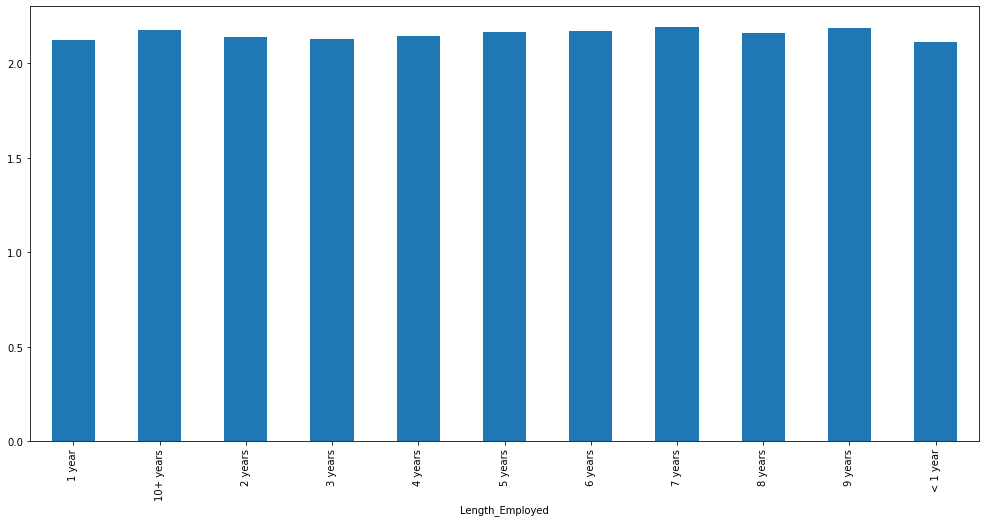

In [255]:
train.groupby('Length_Employed')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
Length of 10+ years is maximum and it is dominating length employed class and least is 9 years

<AxesSubplot:xlabel='Home_Owner'>

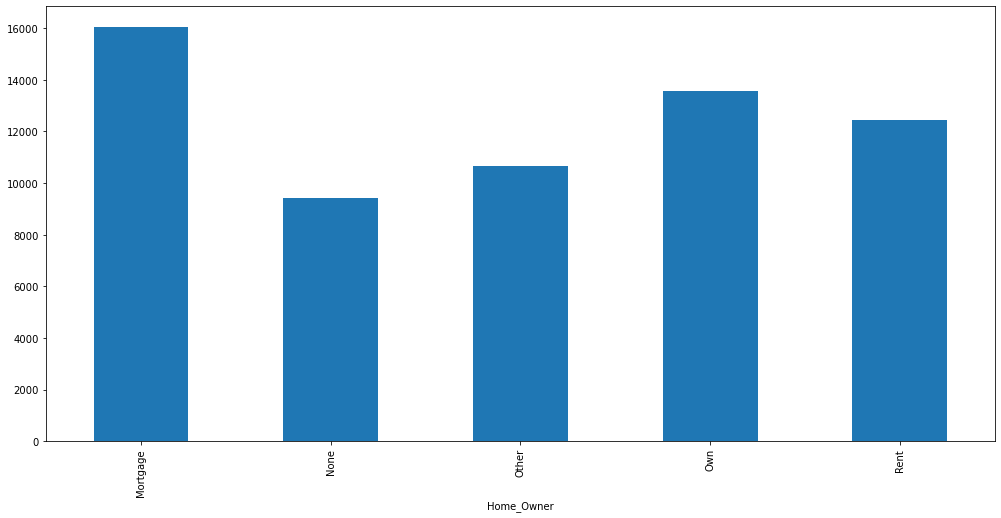

In [256]:
train.groupby('Home_Owner')['Loan_Amount_Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

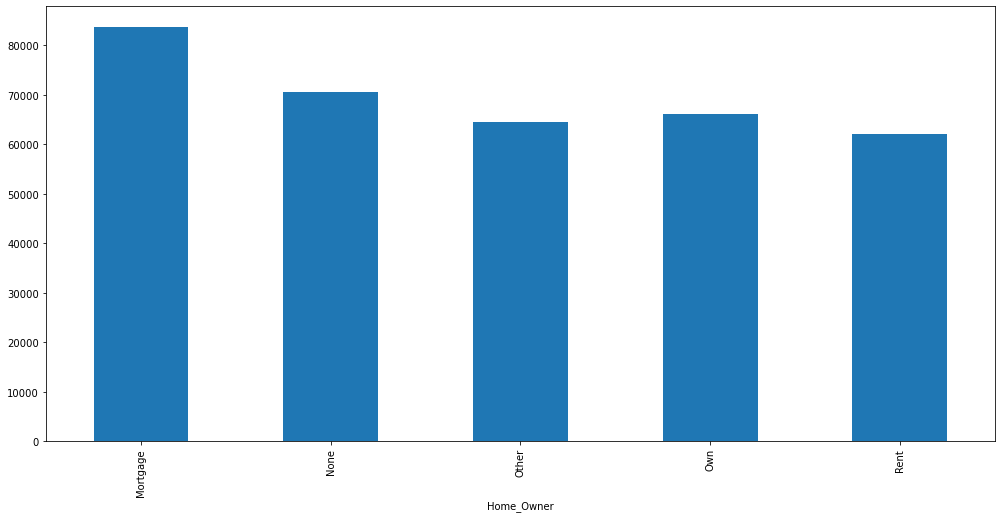

In [257]:
train.groupby('Home_Owner')['Annual_Income'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

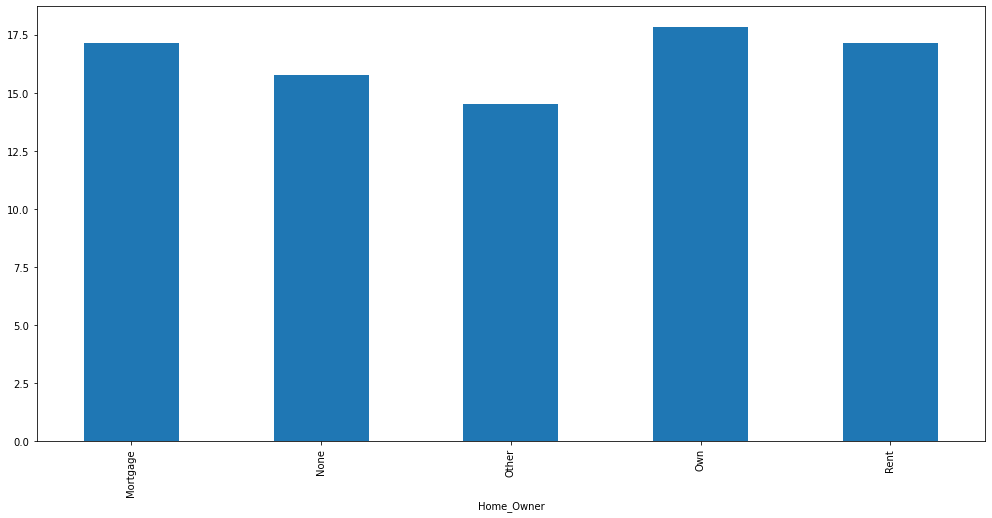

In [258]:
train.groupby('Home_Owner')['Debt_To_Income'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

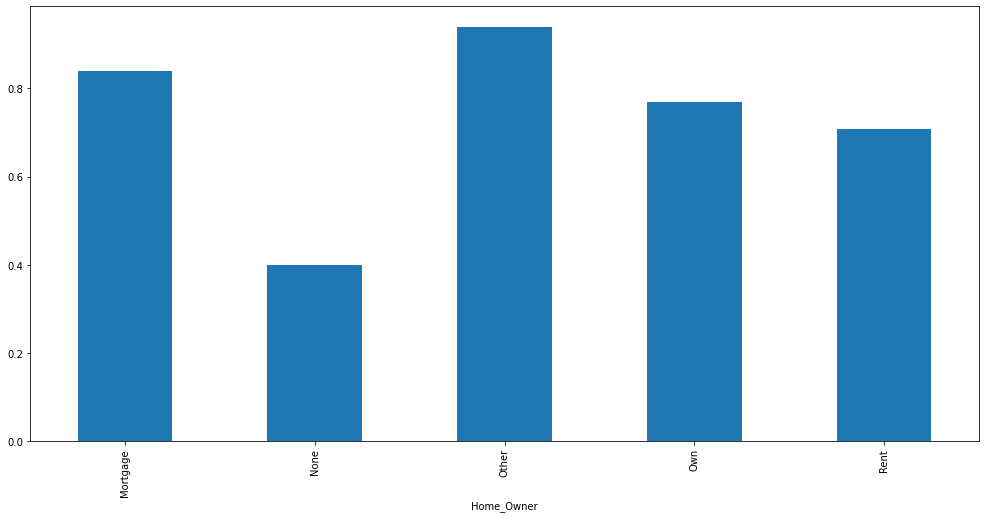

In [259]:
train.groupby('Home_Owner')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

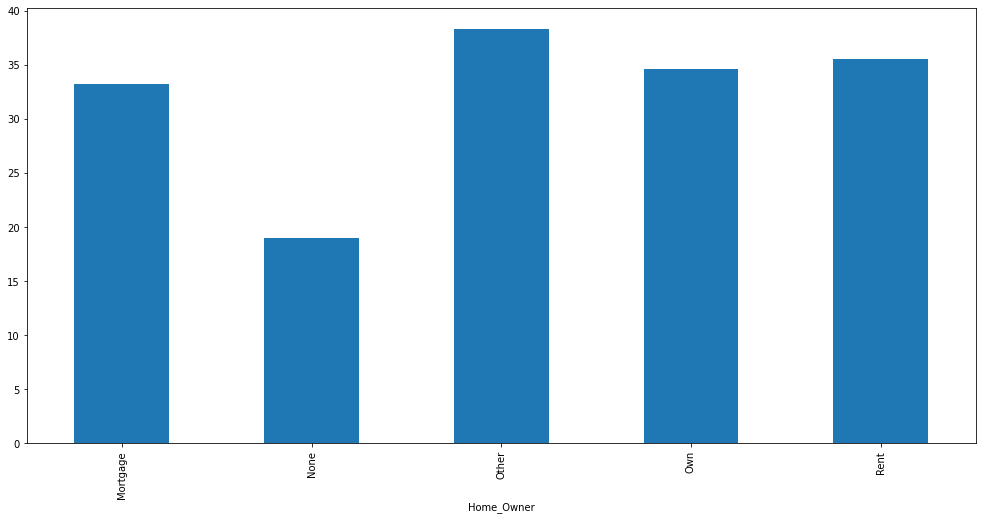

In [260]:
train.groupby('Home_Owner')['Months_Since_Deliquency'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

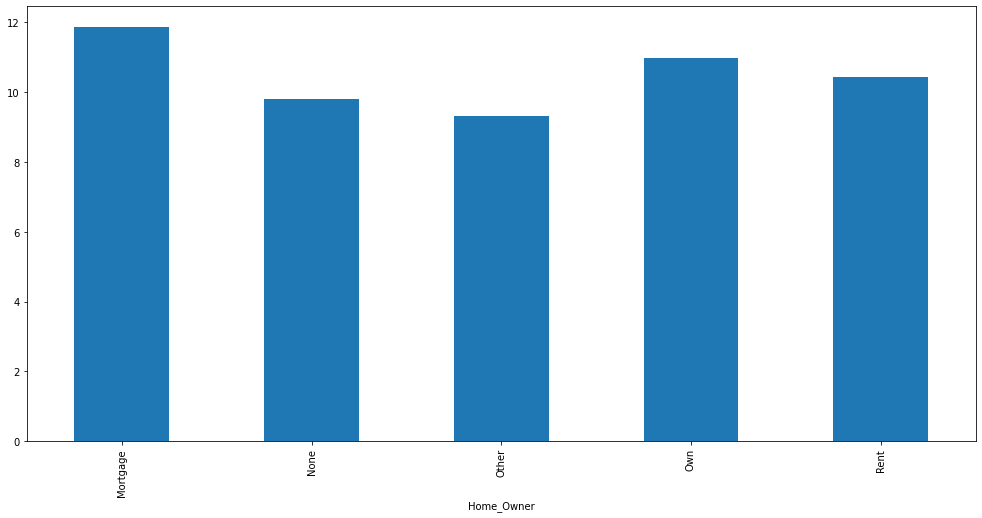

In [261]:
train.groupby('Home_Owner')['Number_Open_Accounts'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

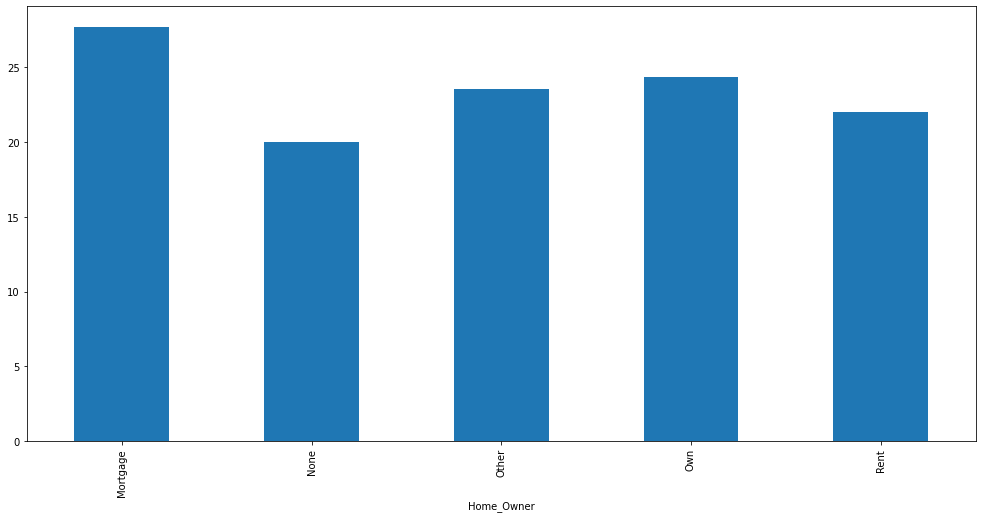

In [262]:
train.groupby('Home_Owner')['Total_Accounts'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Home_Owner'>

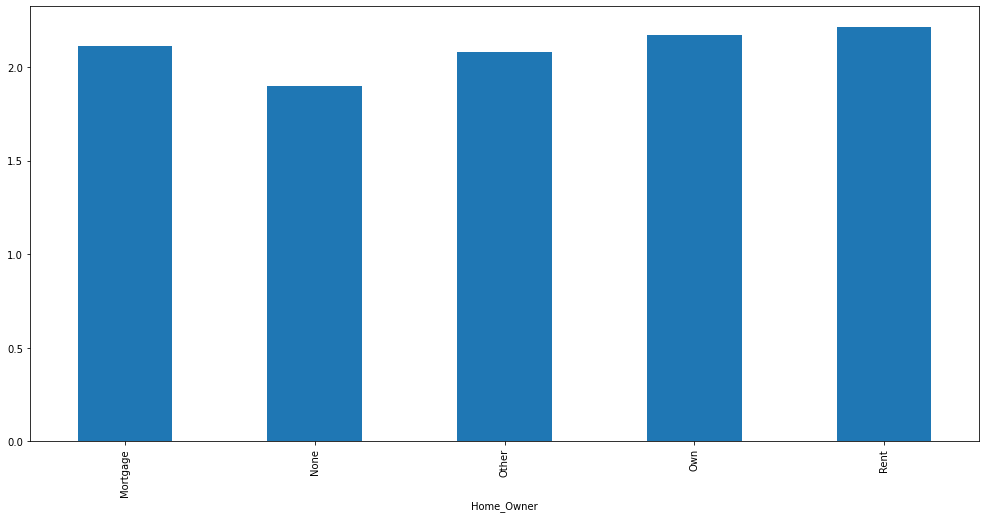

In [263]:
train.groupby('Home_Owner')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
Home owners are mostly Mortage follwed by rent then own and none and others are insignificant

<AxesSubplot:xlabel='Income_Verified'>

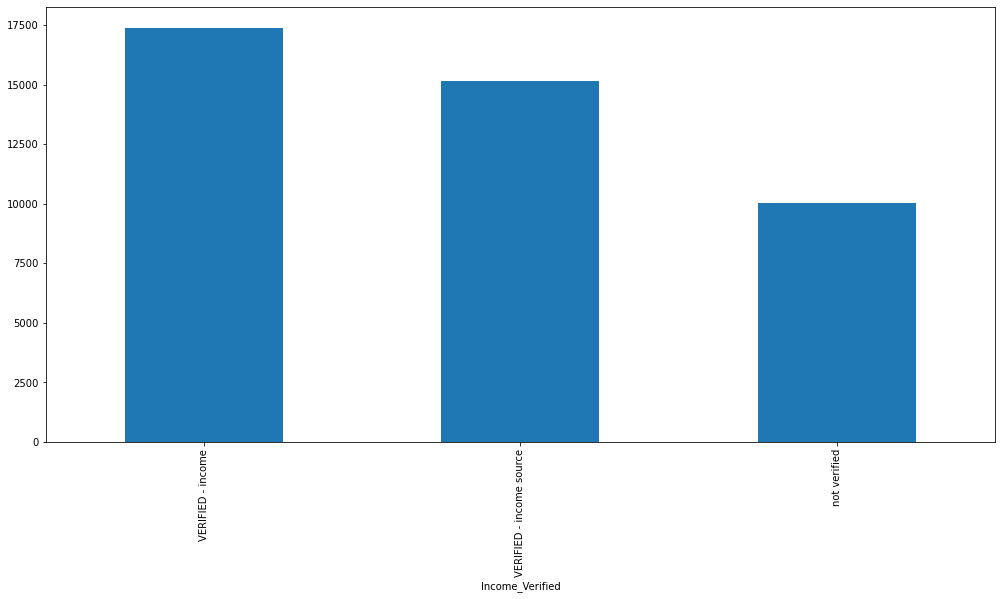

In [264]:
train.groupby('Income_Verified')['Loan_Amount_Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

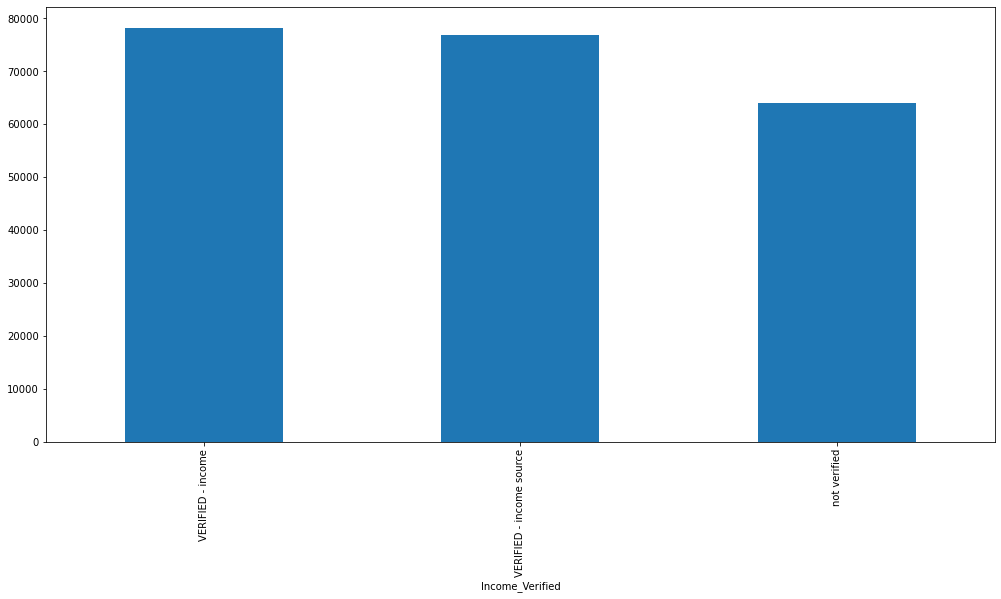

In [265]:
train.groupby('Income_Verified')['Annual_Income'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

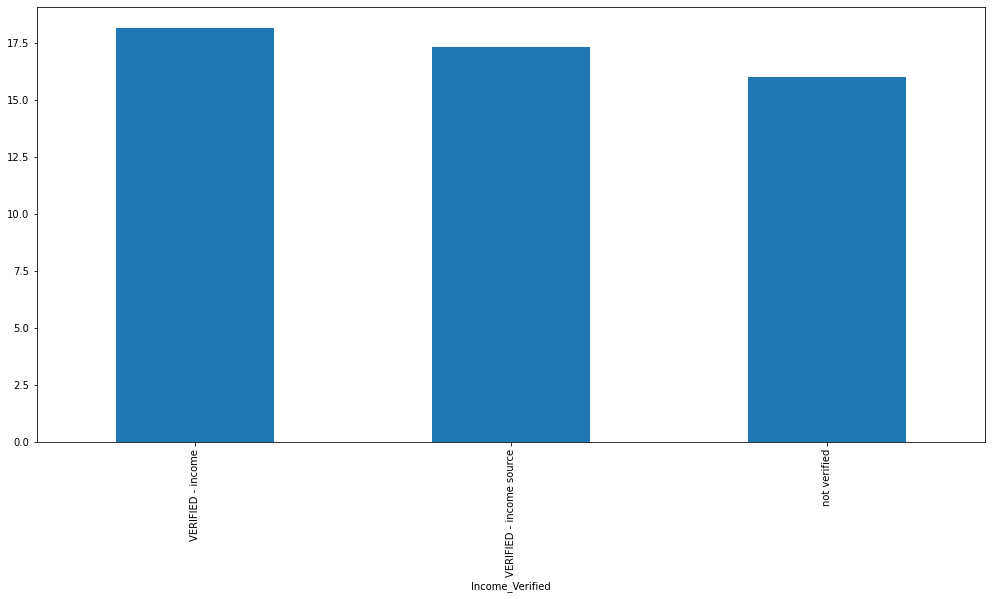

In [266]:
train.groupby('Income_Verified')['Debt_To_Income'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

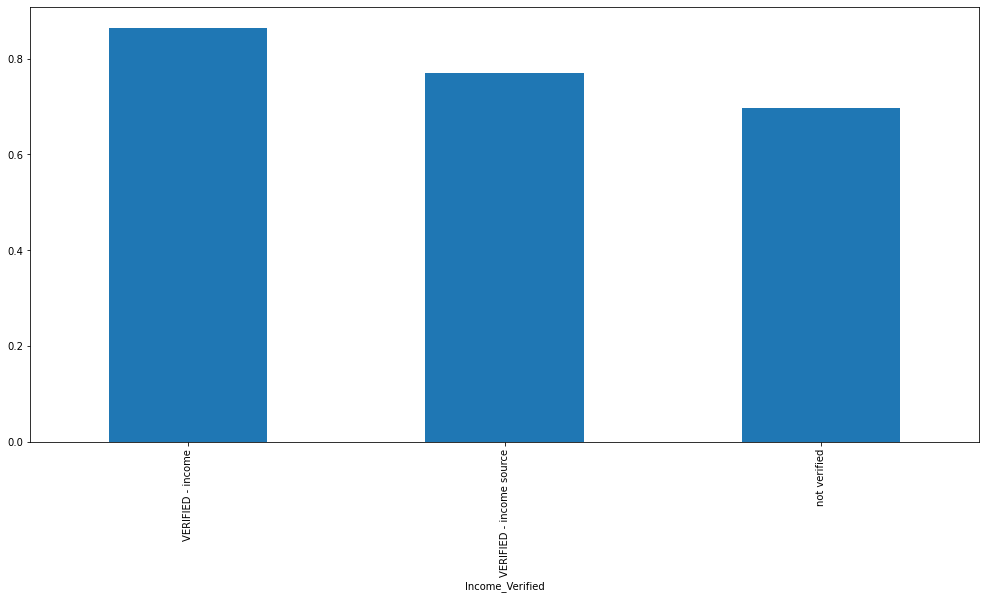

In [267]:
train.groupby('Income_Verified')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

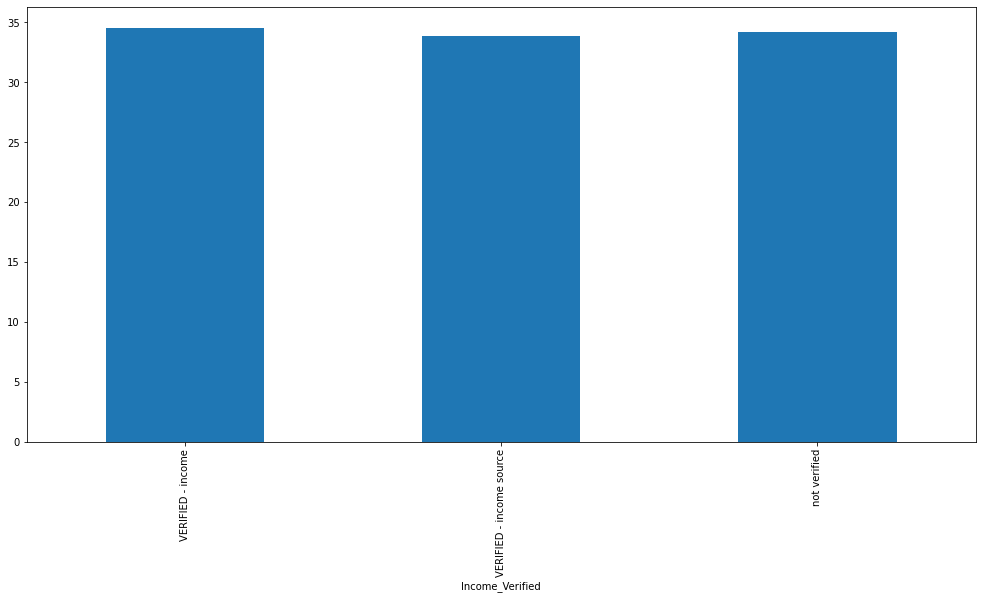

In [268]:
train.groupby('Income_Verified')['Months_Since_Deliquency'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

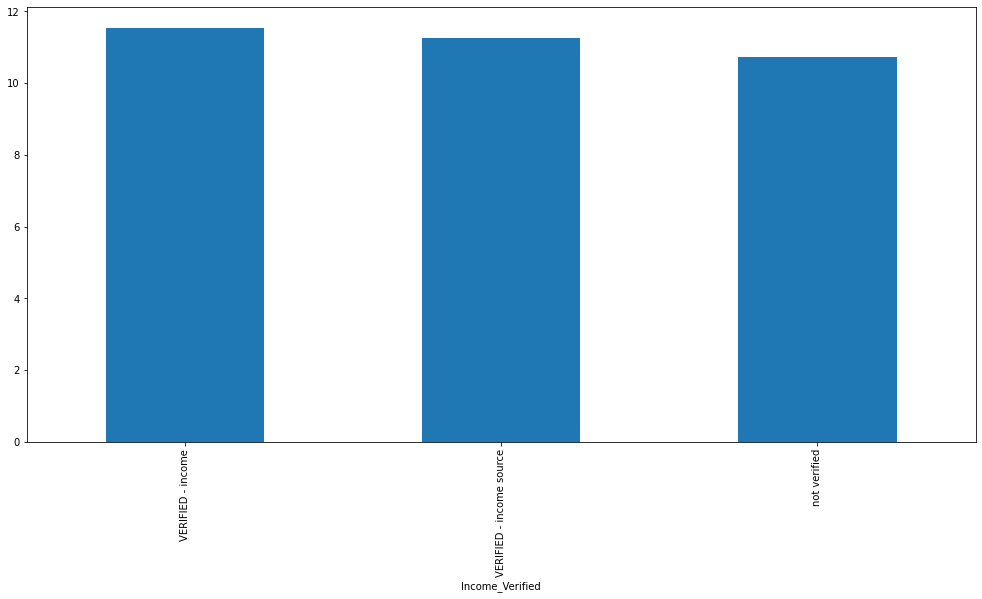

In [269]:
train.groupby('Income_Verified')['Number_Open_Accounts'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

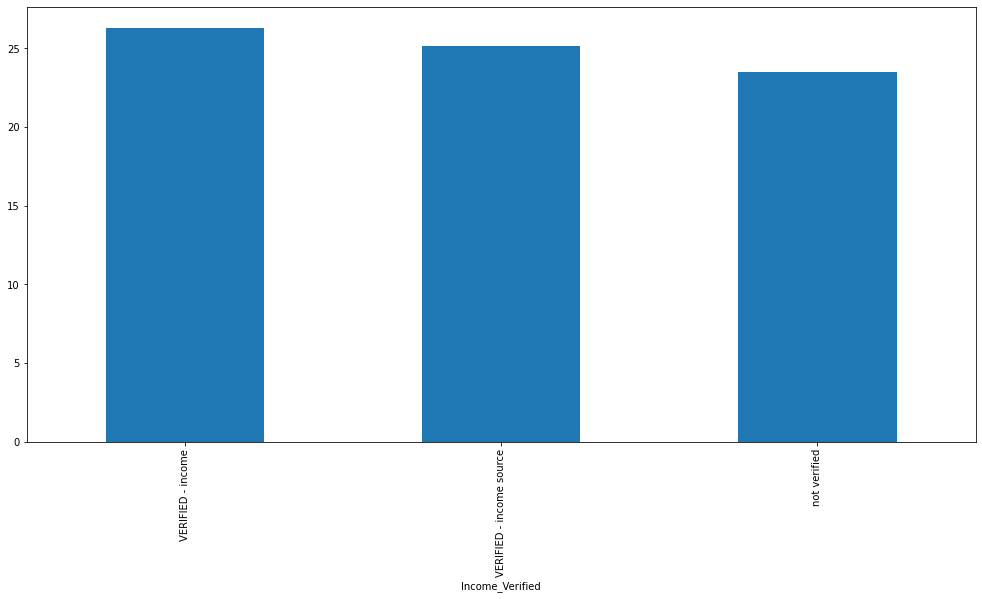

In [270]:
train.groupby('Income_Verified')['Total_Accounts'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Income_Verified'>

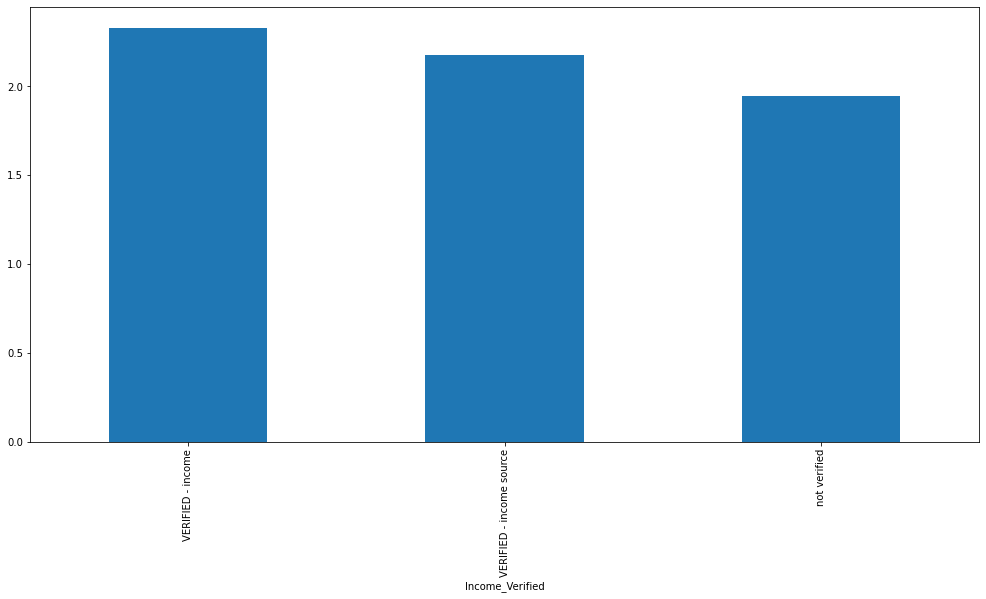

In [271]:
train.groupby('Income_Verified')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
Verified has income verified dominating Income varified followed by income source and least by not varified

<AxesSubplot:xlabel='Purpose_Of_Loan'>

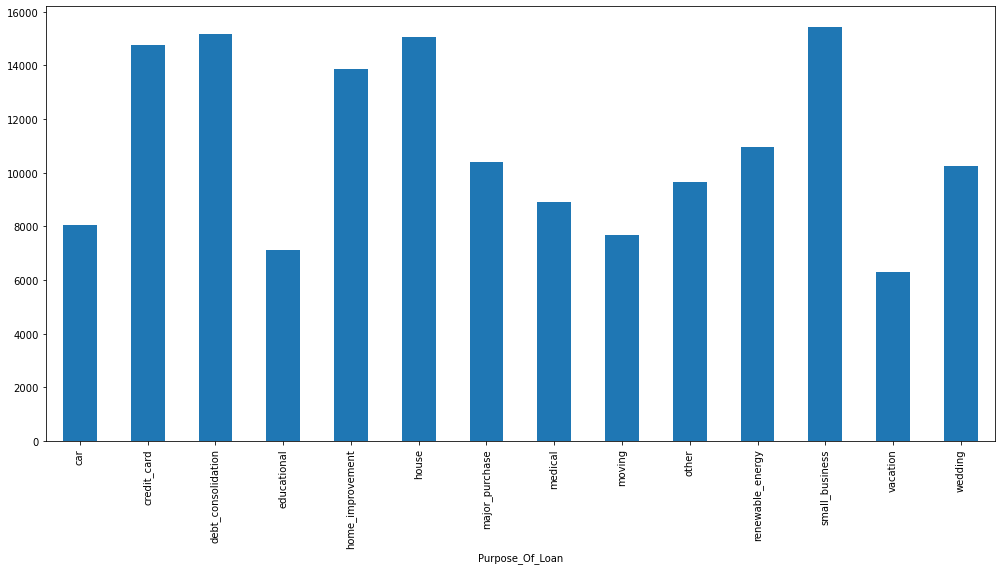

In [272]:
train.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Purpose_Of_Loan'>

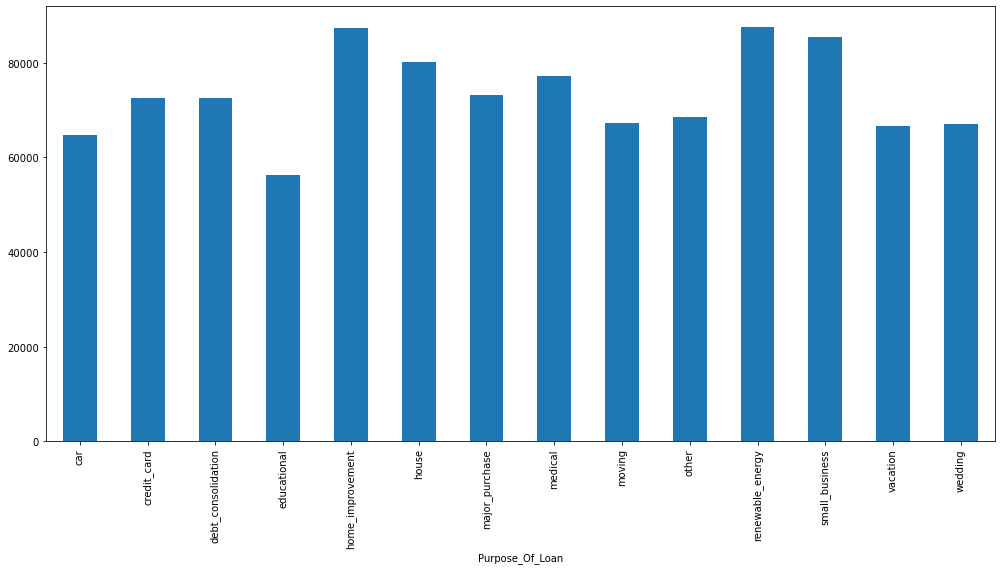

In [273]:
train.groupby('Purpose_Of_Loan')['Annual_Income'].mean().plot(kind='bar')

### inference - 
debt consolidation dominating purpose of loan

<AxesSubplot:xlabel='Purpose_Of_Loan'>

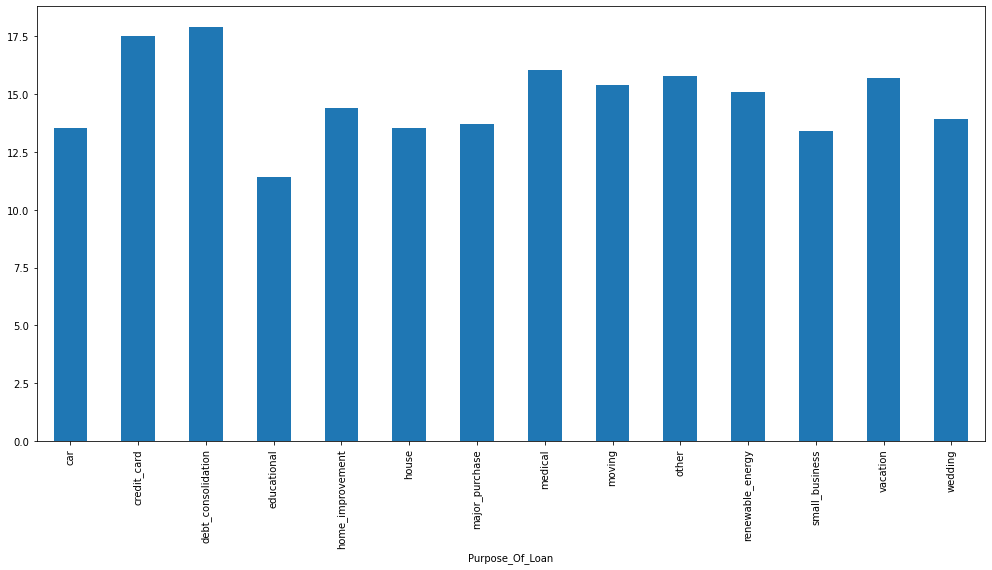

In [274]:
train.groupby('Purpose_Of_Loan')['Debt_To_Income'].mean().plot(kind='bar')

### inference - 
Debt consolidation has most debt to income ratio followed by credit card where wedding has least

<AxesSubplot:xlabel='Purpose_Of_Loan'>

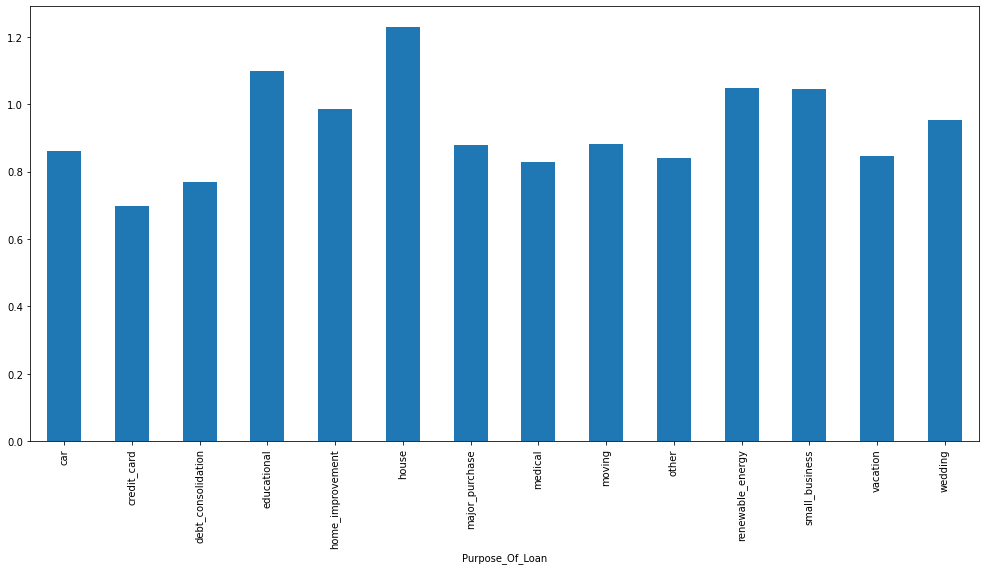

In [275]:
train.groupby('Purpose_Of_Loan')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

### inference - 
debt consolidation has most inquiries followed by credit card

<AxesSubplot:xlabel='Purpose_Of_Loan'>

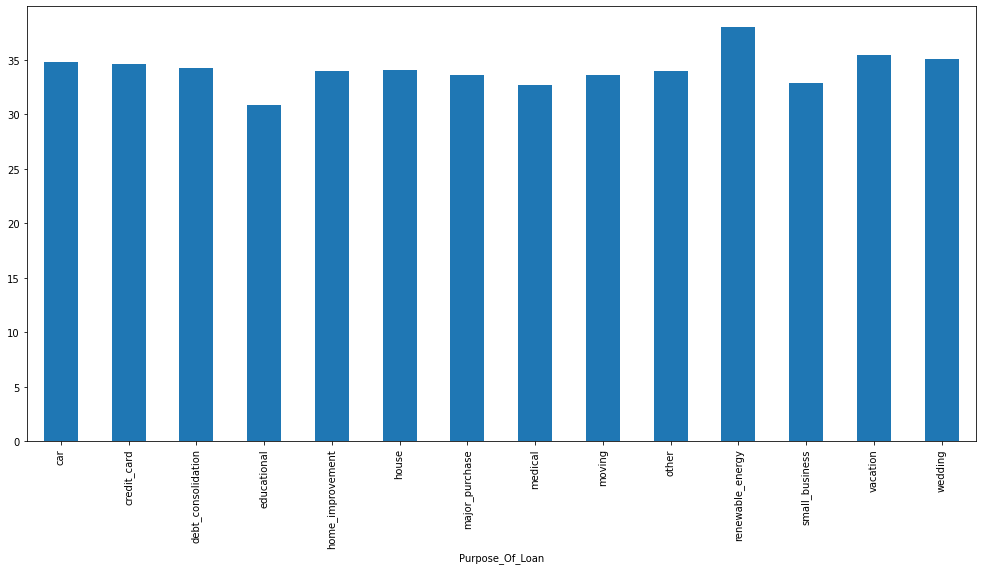

In [276]:
train.groupby('Purpose_Of_Loan')['Months_Since_Deliquency'].mean().plot(kind='bar')

### inference - 
debt consolidation and credt card has mostdeliquency

<AxesSubplot:xlabel='Purpose_Of_Loan'>

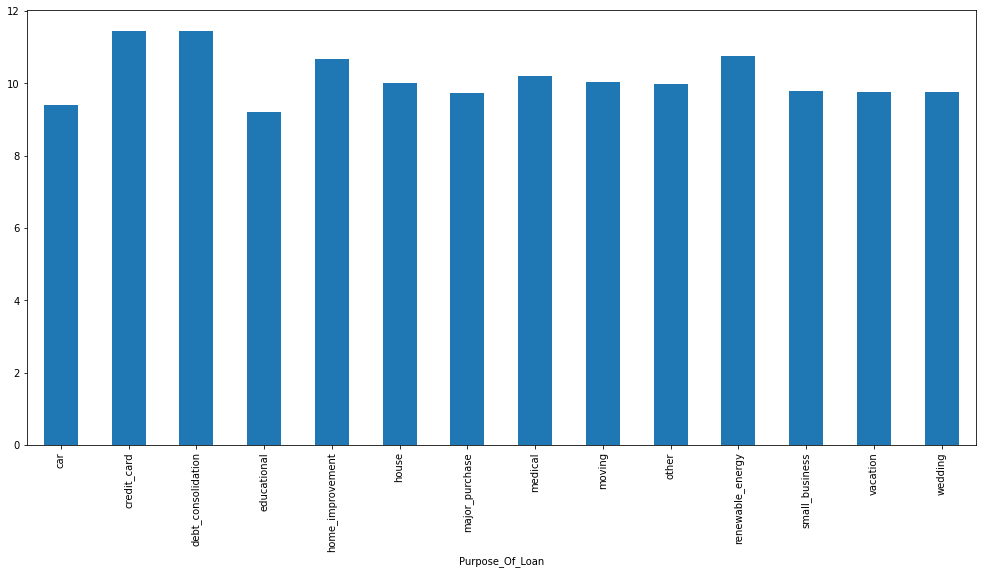

In [277]:
train.groupby('Purpose_Of_Loan')['Number_Open_Accounts'].mean().plot(kind='bar')

### inference - 
debt consilidation is main chatagery for number of open account

<AxesSubplot:xlabel='Purpose_Of_Loan'>

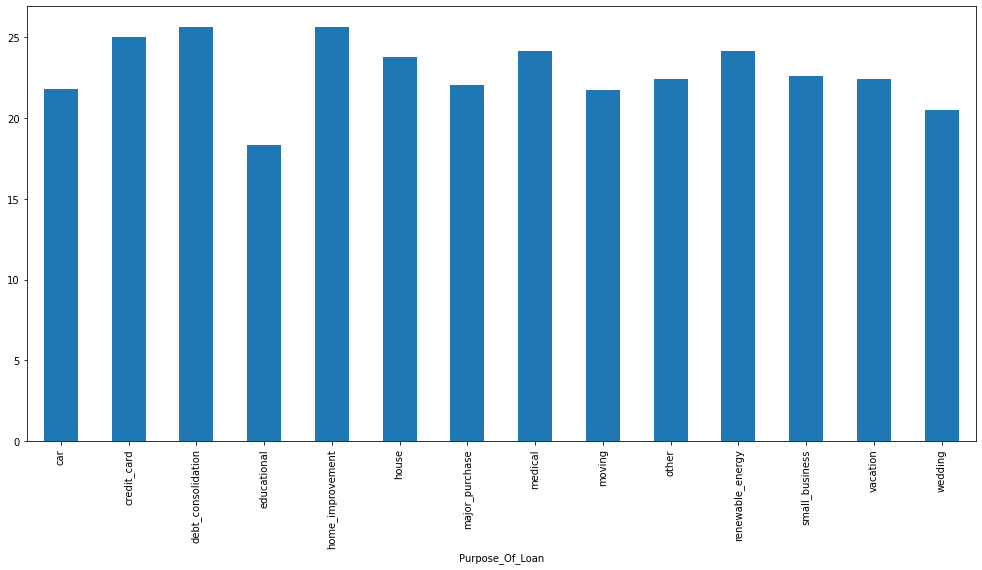

In [278]:
train.groupby('Purpose_Of_Loan')['Total_Accounts'].mean().plot(kind='bar')

### inference - 
debt consolidation is main purpose of loan in total accounts

<AxesSubplot:xlabel='Purpose_Of_Loan'>

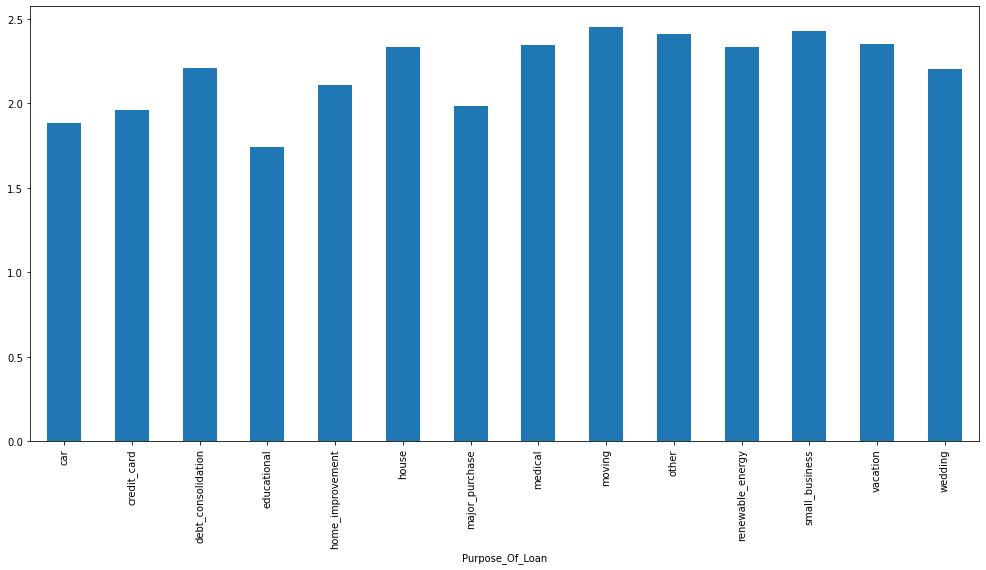

In [279]:
train.groupby('Purpose_Of_Loan')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
Debt consolidation has high intreast rate

Debt consolidation domination purpose of loan followed by credit card and least by wedding as well as car house

<AxesSubplot:xlabel='Gender'>

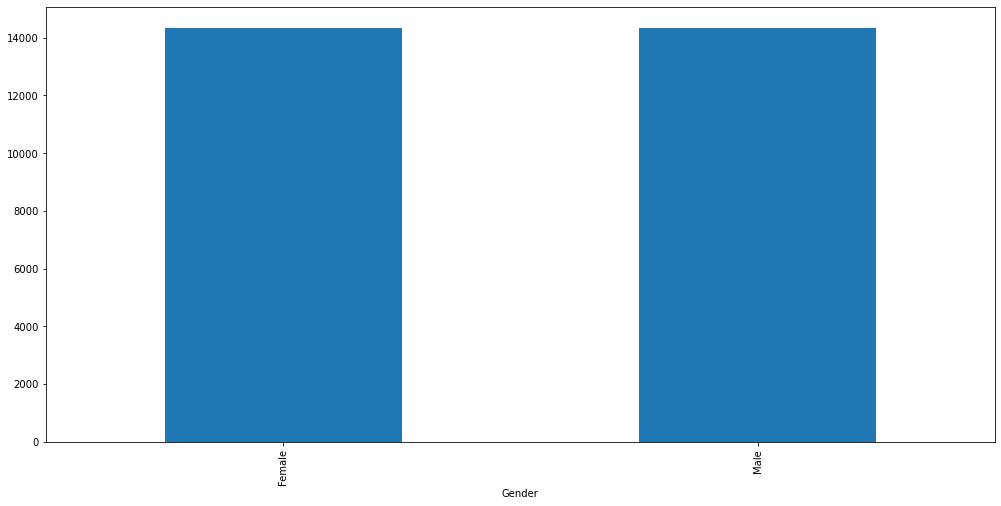

In [280]:
train.groupby('Gender')['Loan_Amount_Requested'].mean().plot(kind='bar')

### inference - 
males requeted loan ammount as compared to females

<AxesSubplot:xlabel='Gender'>

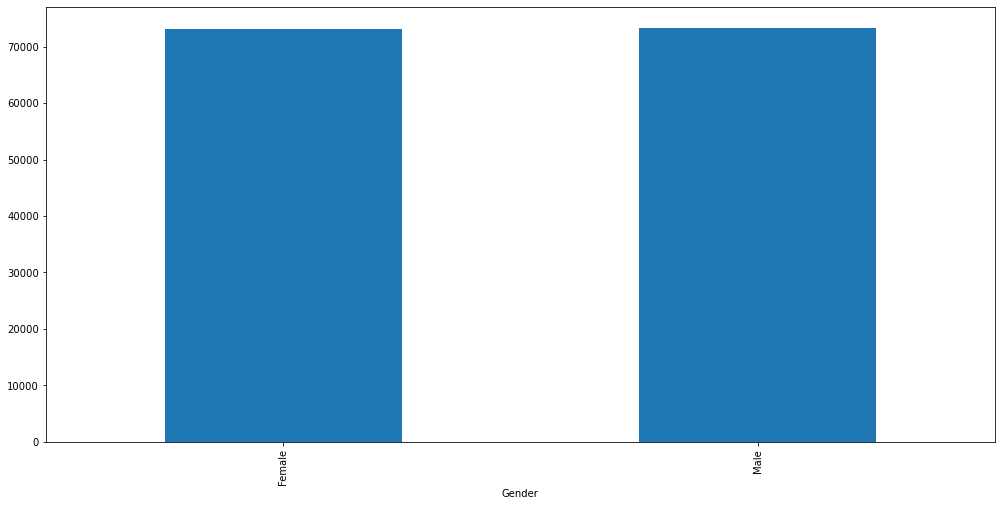

In [281]:
train.groupby('Gender')['Annual_Income'].mean().plot(kind='bar')

### inference - 
males have more annual income as compared to females

<AxesSubplot:xlabel='Gender'>

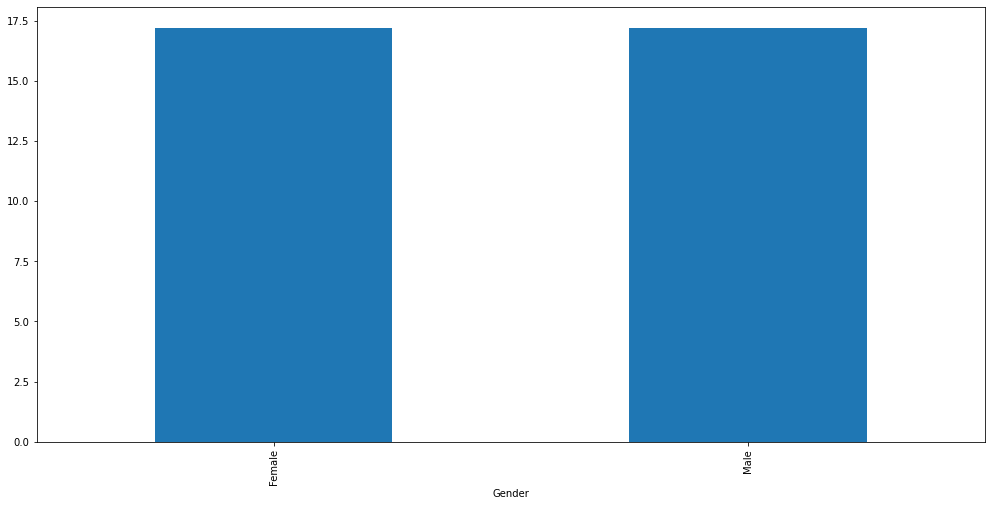

In [282]:
train.groupby('Gender')['Debt_To_Income'].mean().plot(kind='bar')

### inference - 
males have more debt to income 

<AxesSubplot:xlabel='Gender'>

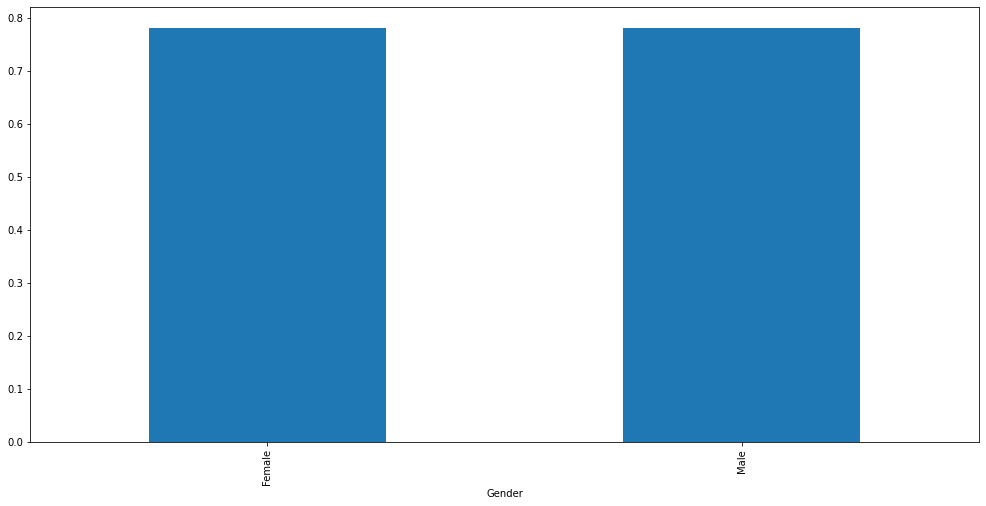

In [283]:
train.groupby('Gender')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

### inference - 
males inquies in last 6 month compared to females

<AxesSubplot:xlabel='Gender'>

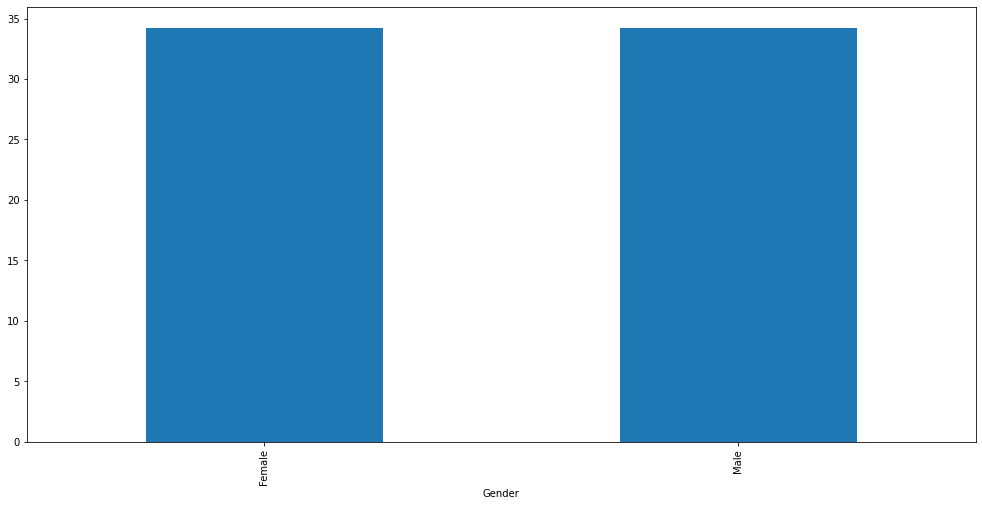

In [284]:
train.groupby('Gender')['Months_Since_Deliquency'].mean().plot(kind='bar')

### inference - 
males take more default in emi's as compared to females

<AxesSubplot:xlabel='Gender'>

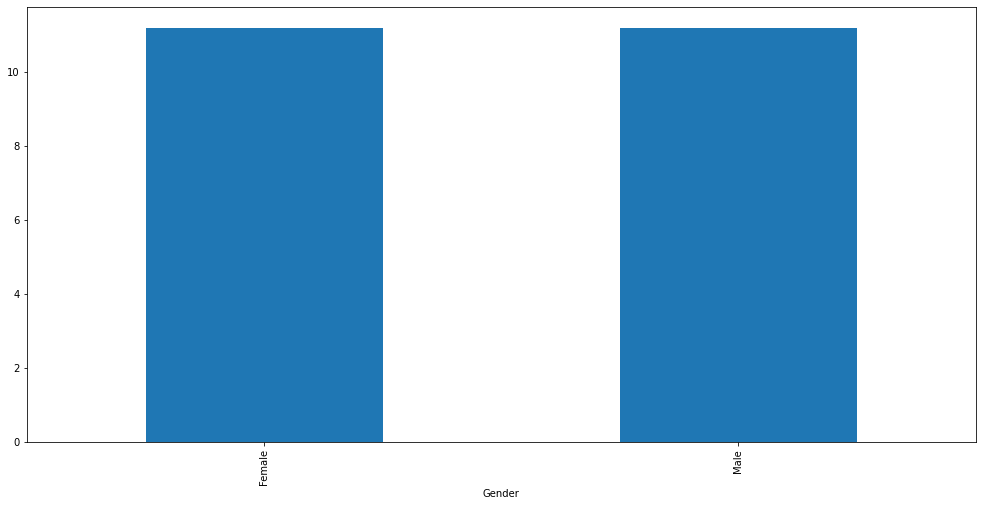

In [285]:
train.groupby('Gender')['Number_Open_Accounts'].mean().plot(kind='bar')

### inference - 
males have more number of open accounts as compared to females

<AxesSubplot:xlabel='Gender'>

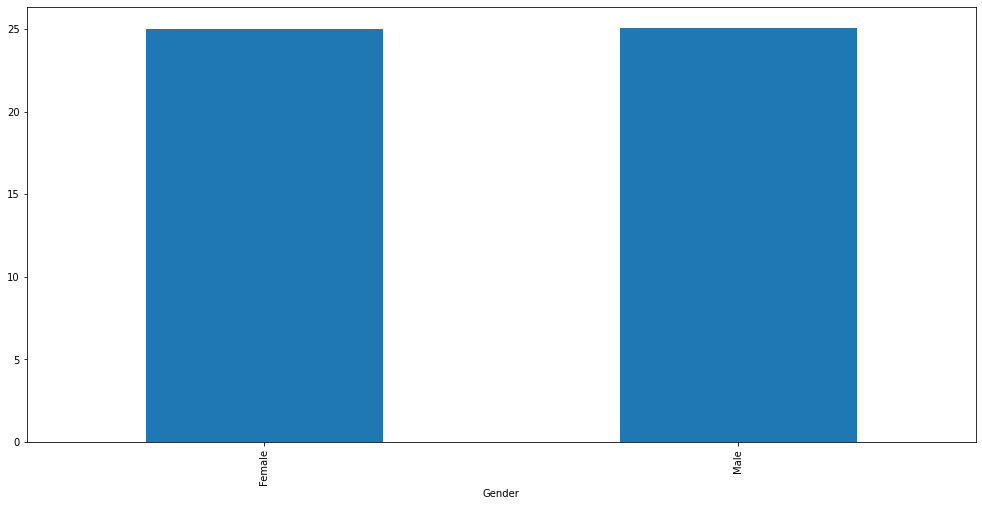

In [286]:
train.groupby('Gender')['Total_Accounts'].mean().plot(kind='bar')

### inference - 
males have more total accounts compared to females

<AxesSubplot:xlabel='Gender'>

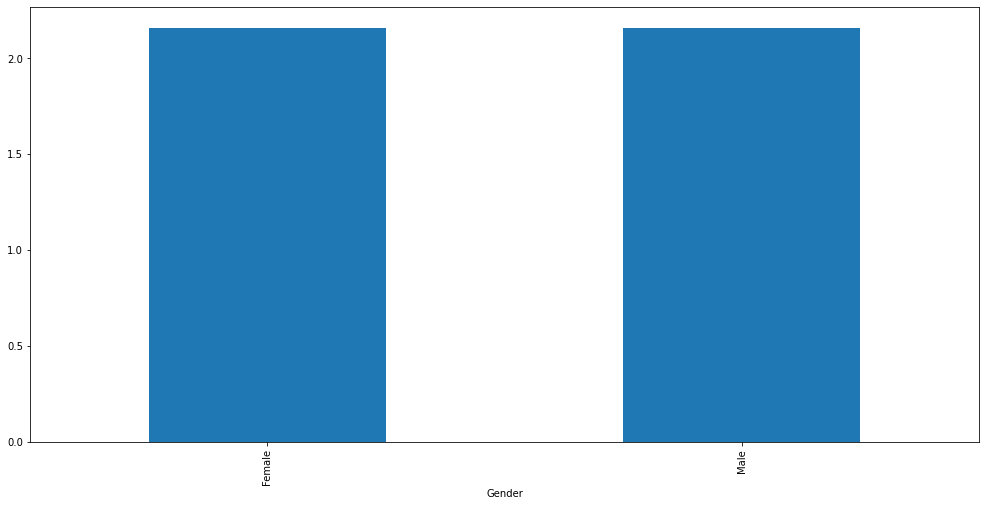

In [288]:
train.groupby('Gender')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
females receive low intreat rate as compared to males

Males are dominating Gender category

# Multivariate analysis

<AxesSubplot:>

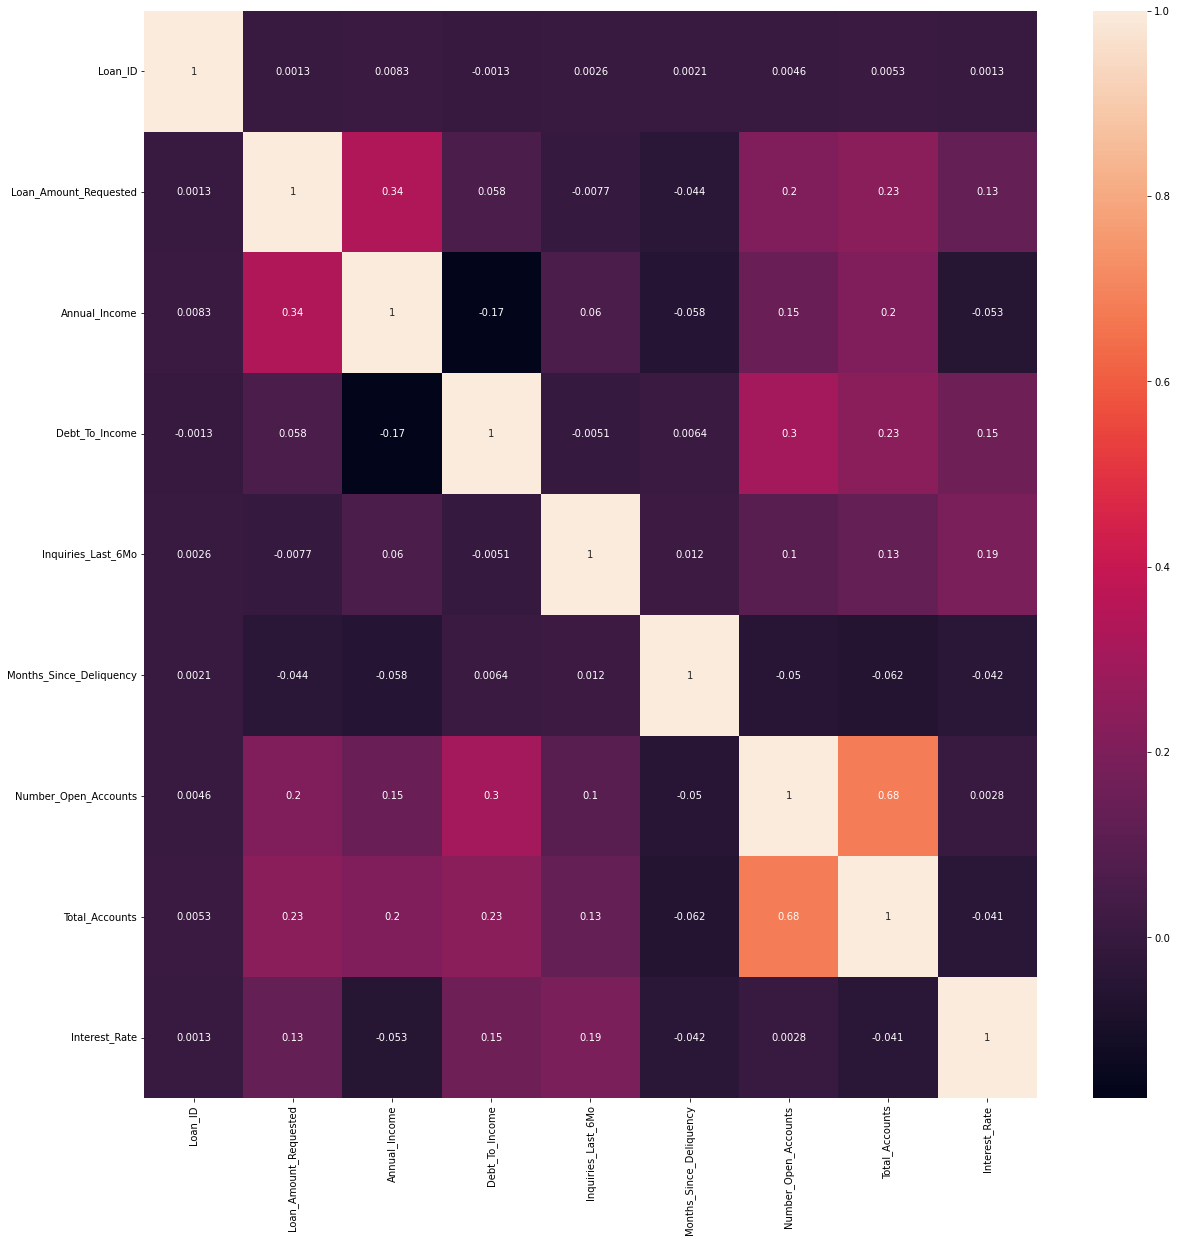

In [289]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

### inference - 
here Loan ammount requested and annual income has highest corelation so we can infer person who has high annual income he can go for high loan ammount while loan ammount and inqiries last six month has least correlation

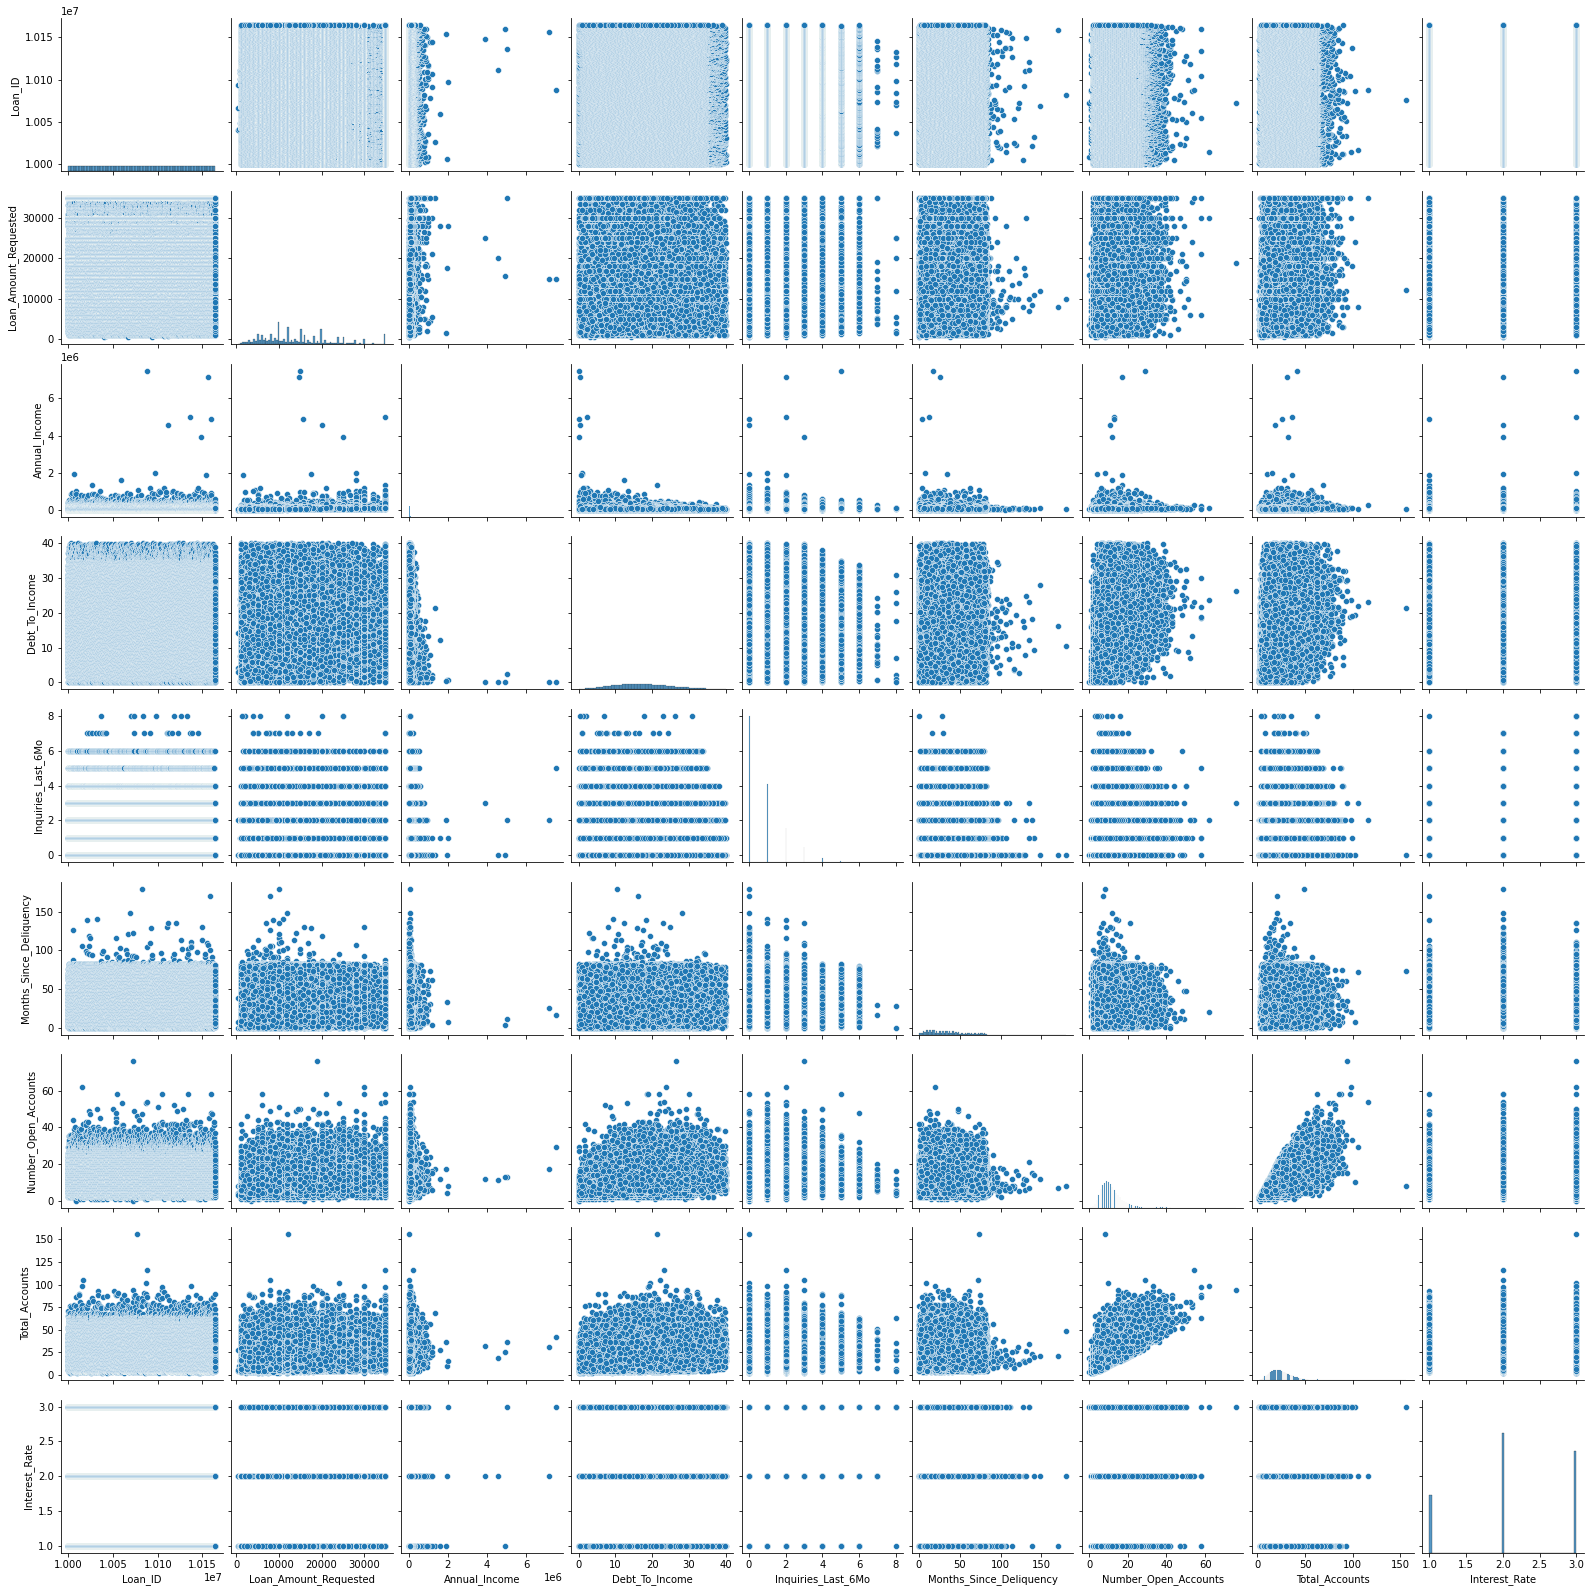

In [290]:
sns.pairplot(train)

# Numerical - categorical


<Figure size 1080x576 with 0 Axes>

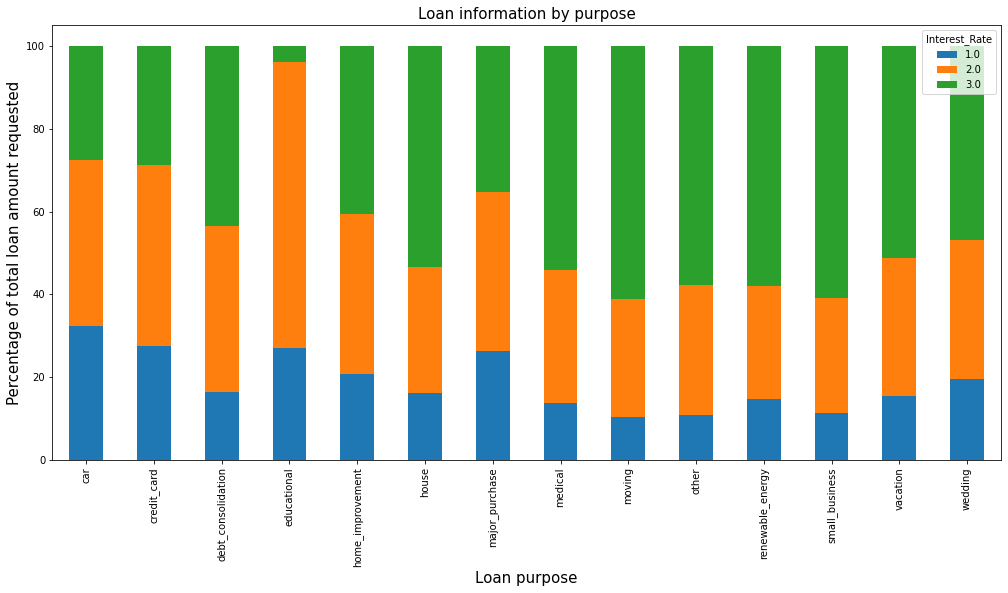

In [291]:
grouped = train.groupby(['Purpose_Of_Loan', 'Interest_Rate'])['Loan_Amount_Requested'].sum().reset_index()

# calculate the total loan amount requested for each purpose
total_by_purpose = grouped.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].sum()

# add a column for the percentage of loan amount requested for each interest rate within each purpose
grouped['Percent'] = grouped.apply(lambda x: x['Loan_Amount_Requested'] / total_by_purpose[x['Purpose_Of_Loan']] * 100, axis=1)

# pivot the table to create a stacked bar plot
pivot = grouped.pivot(index='Purpose_Of_Loan', columns='Interest_Rate', values='Percent')

# set the figure size
plt.figure(figsize=(15,8))

# create the stacked bar plot
pivot.plot(kind='bar', stacked=True)

# add plot and axes labels
plt.title('Loan information by purpose', fontsize = 15)
plt.xlabel('Loan purpose', fontsize = 15)
plt.ylabel('Percentage of total loan amount requested', fontsize = 15)

# display the plot
plt.show()

### Inference -  
the stacked bar plot is showing that the loan of high intertest rate are present in home_improvement, house, medical, moving, other, renewable_energy, small_business, vacation, wedding. The loan of medium interest rate are car, credit_card, educational. The educational and major_purchase have low interest rate. 

## Convert string into int 'Length_Employed'

In [292]:
#create are def function for Length_Employed 
def ln_emp(x):
    #convert string into single int form
    if x == '1 year':
        x =1
    elif x == '10+ years':
        x = 11
    elif x =='2 years':
        x=2
    elif x == '3 years':
        x =3
    elif x == '4 years':
        x =4
    elif x == '5 years':
        x =5
    elif x == '6 years':
        x =6
    elif x == '7 years':
        x =7
    elif x == '8 years':
        x =8
    elif x == '9 years':
        x =9
    elif x == '< 1 year':
        x =0
    return(x) 
train.Length_Employed = train.Length_Employed.apply(ln_emp)
#test.Length_Employed = train.Length_Employed.apply(ln_emp)

In [293]:
# variable Loan_Amount_Requested has been misleaded due to the pppresence of ','.hence here we have replace the ',' through .str.replace method
# and changed the data type from 'object' to 'integer'

## Droping the columns

In [294]:
#Months_Since_Deliquency : it have 54% missing value 
train=train.drop('Months_Since_Deliquency',axis=1)
#test=train.drop('Months_Since_Deliquency',axis=1)

In [295]:
#Loan_ID : This is a unique identifier for each order and does not provide any information that can help with the prediction task.
train=train.drop('Loan_ID',axis=1)

# Handle The Missing Value

### 'Home_Owner' Create a new value and fill all Null value in that

In [296]:
train.Home_Owner.unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [297]:
train['Home_Owner'].fillna('NoHome',inplace=True)
#test['Home_Owner'].fillna('NoHome',inplace=True)

### 'Length_Employed' Hand the null value

In [298]:
# Filling the 'Length_Employed' with Median 
train['Length_Employed'].fillna(train['Length_Employed'].median(),inplace=True)
#test['Length_Employed'].fillna(train['Length_Employed'].median(),inplace=True)

### 'Annual_Income' Predict the missing value with LinearRegression model

In [299]:
print("Annual_Income Null Valuse is:",train['Annual_Income'].isnull().sum())

25102

In [300]:
from sklearn.linear_model import LinearRegression

#Get_dummies on Data set and save in dummy
dummy=pd.get_dummies(train,drop_first=True)

# Separate the dataframe into two subsets, one with non-missing Annual_Income values and one with missing Annual_Income values
train_df_with_income = dummy[dummy['Annual_Income'].notnull()]
train_df_missing_income = dummy[dummy['Annual_Income'].isnull()]

# Use the other features in the dataset to train a linear regression model to predict Annual_Income
features =dummy.drop('Annual_Income',axis=1).columns.tolist()

X_train = train_df_with_income[features]
y_train = train_df_with_income['Annual_Income']
reg = LinearRegression().fit(X_train, y_train)

# Predict the missing Annual_Income values using the trained regression model
X_missing = train_df_missing_income[features]
predicted_income = reg.predict(X_missing)

# Fill in the missing Annual_Income values with the predicted values
train.loc[train['Annual_Income'].isnull(), 'Annual_Income'] = predicted_income

In [301]:
print("Afther handle the NUll value:",train['Annual_Income'].isnull().sum())

0

# Checking Outliers

In [302]:
## non-parametric test (IQR)

In [303]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Length_Employed'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Length_Employed'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Length_Employed'] if x < q1 - threshold*IQR]

# Print the outliers
print("Upper outliers:", outliers_upper)
print("Lower outliers:", outliers_lower)

Upper outliers: []
Lower outliers: []


In [304]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Loan_Amount_Requested'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Loan_Amount_Requested'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Loan_Amount_Requested'] if x < q1 - threshold*IQR]

# Print the outliers
print("Upper outliers:", outliers_upper)
print("Lower outliers:", outliers_lower)

Upper outliers: []
Lower outliers: []


In [305]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Annual_Income'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Annual_Income'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Annual_Income'] if x < q1 - threshold*IQR]

# Print the outliers first 5 values
print("Upper outliers:", outliers_upper[:5])
print("Lower outliers:", outliers_lower[:5])

Upper outliers: [400000.0, 350000.0, 265000.0, 550000.0, 357000.0]
Lower outliers: []


## inference - there are no lower outliers found.

In [306]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Debt_To_Income'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Debt_To_Income'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Debt_To_Income'] if x < q1 - threshold*IQR]

# Print the outliers first 5 values
print("Upper outliers:", outliers_upper[:5])
print("Lower outliers:", outliers_lower[:5])

Upper outliers: []
Lower outliers: []


In [307]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Inquiries_Last_6Mo'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Inquiries_Last_6Mo'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Inquiries_Last_6Mo'] if x < q1 - threshold*IQR]

# Print the outliers first 5 values
print("Upper outliers:", outliers_upper[:5])
print("Lower outliers:", outliers_lower[:5])

Upper outliers: [5.0, 6.0, 5.0, 6.0, 6.0]
Lower outliers: []


In [308]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Number_Open_Accounts'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Number_Open_Accounts'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Number_Open_Accounts'] if x < q1 - threshold*IQR]

# Print the outliers first 5 values
print("Upper outliers:", outliers_upper[:5])
print("Lower outliers:", outliers_lower[:5])

Upper outliers: [36.0, 36.0, 44.0, 37.0, 39.0]
Lower outliers: []


In [309]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Total_Accounts'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Total_Accounts'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Total_Accounts'] if x < q1 - threshold*IQR]

# Print the outliers first 5 values
print("Upper outliers:", outliers_upper[:5])
print("Lower outliers:", outliers_lower[:5])

Upper outliers: [86.0, 90.0, 89.0, 98.0, 105.0]
Lower outliers: []


In [310]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Interest_Rate'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 3.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Interest_Rate'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Interest_Rate'] if x < q1 - threshold*IQR]

# Print the outliers first 5 values
print("Upper outliers:", outliers_upper[:5])
print("Lower outliers:", outliers_lower[:5])

Upper outliers: []
Lower outliers: []


In [311]:
# numerical variables like ''Annual_Income',Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts contain outliers 

### Perform ANOVA to test the equality of means

In [312]:
from scipy import stats

In [313]:
#Loan_Amount_Requested
# Null hypothesis
#𝐻0: The averages of all treatments are the same.

#𝐻1: At least one treatment has a different average.


# we have three groups: 1, 2, 3
# extract the data for each Interest_Rate into separate arrays
class_1=train[train['Interest_Rate']==1]['Loan_Amount_Requested']
class_2=train[train['Interest_Rate']==2]['Loan_Amount_Requested']
class_3=train[train['Interest_Rate']==3]['Loan_Amount_Requested']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 1936.5452716421166
p-value: 0.0


In [314]:
# inference - as p value is < 0.5 hence  reject null which means all means are different so we can conclude that 
#the col 'Loan_Amount_Requested ' impact on target varible 
#hence we will not drop this col

In [315]:
#Length_Employed

class_1=train[train['Interest_Rate']==1]['Length_Employed']
class_2=train[train['Interest_Rate']==2]['Length_Employed']
class_3=train[train['Interest_Rate']==3]['Length_Employed']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 73.3268708900736
p-value: 1.474851218507049e-32


In [316]:
#Annual_Income

class_1=train[train['Interest_Rate']==1]['Annual_Income']
class_2=train[train['Interest_Rate']==2]['Annual_Income']
class_3=train[train['Interest_Rate']==3]['Annual_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 426.03145313061475
p-value: 2.850937953626584e-185


In [317]:
#Debt_To_Income

class_1=train[train['Interest_Rate']==1]['Debt_To_Income']
class_2=train[train['Interest_Rate']==2]['Debt_To_Income']
class_3=train[train['Interest_Rate']==3]['Debt_To_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 2001.7973519110305
p-value: 0.0


In [318]:
#'Inquiries_Last_6Mo'

class_1=train[train['Interest_Rate']==1]['Inquiries_Last_6Mo']
class_2=train[train['Interest_Rate']==2]['Inquiries_Last_6Mo']
class_3=train[train['Interest_Rate']==3]['Inquiries_Last_6Mo']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 3125.997973994689
p-value: 0.0


In [319]:
#Number_Open_Accounts

class_1=train[train['Interest_Rate']==1]['Number_Open_Accounts']
class_2=train[train['Interest_Rate']==2]['Number_Open_Accounts']
class_3=train[train['Interest_Rate']==3]['Number_Open_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 38.89204695156436
p-value: 1.2983609557711249e-17


In [320]:
#'Total_Accounts'

class_1=train[train['Interest_Rate']==1]['Total_Accounts']
class_2=train[train['Interest_Rate']==2]['Total_Accounts']
class_3=train[train['Interest_Rate']==3]['Total_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 212.11450799588098
p-value: 9.966895838922742e-93


# inference - 
all numerical colms having p_value < 0.5 that means reject null hypothesis 
which means all means are different and independent vairables having impact on target variables,
hence we will not drop any columns

# Thipes state test on cat vs cat do here

#  Base Model With Outlier

In [321]:
# Define the categorical columns to encode
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
x=df_encoded.drop('Interest_Rate', axis=1)
y=df_encoded['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Evaluate the model on the testing set
accuracy = lr.score(xtest, ytest)
print(f'Testing accuracy: {accuracy:.3f}')

Testing accuracy: 0.455


In [323]:
from sklearn.metrics import classification_report
y_pred = lr.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       0.26      0.01      0.01      6721
         2.0       0.45      0.71      0.55     14018
         3.0       0.47      0.41      0.44     12123

    accuracy                           0.46     32862
   macro avg       0.40      0.38      0.33     32862
weighted avg       0.42      0.46      0.40     32862



Inference- the accuracy of the logistic regression model with outliers is 0.45 which is very poor.

# Outliers treatment

In [324]:
q1=train.quantile(0.25)
q3=train.quantile(0.75)
IQR=q3-q1
lower=q1-3.5*IQR
upper=q3+3.5*IQR
data_wo=train[~((train<lower) | (train>upper)).any(axis=1)]
data_wo.head()

Loan_Amount_Requested  Length_Employed Home_Owner  Annual_Income  \
0                   7000              0.0       Rent     68000.0000   
1                  30000              4.0   Mortgage    106442.0605   
2                  24725              7.0   Mortgage     75566.4000   
3                  16000              0.0     NoHome     56160.0000   
4                  17000              8.0        Own     96000.0000   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0              not verified                 car           18.37   
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   

   Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Gender  \
0                 0.0                   9.0            14.0  Female   
1                 0.0                  12.0            24.0  Female   
2                 0.0                  12.0            16.0    Male   
3                 3.0                  16.0            22.0    Male   
4                 1.0                  19.0            30.0  Female   

   Interest_Rate  
0            1.0  
1            3.0  
2            3.0  
3            3.0  
4            1.0

In [325]:
# Define the categorical columns to encode
cat_cols = data_wo.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded2 = pd.get_dummies(data_wo, columns=cat_cols, drop_first=True)

In [326]:
df_encoded2.head()

Loan_Amount_Requested  Length_Employed  Annual_Income  Debt_To_Income  \
0                   7000              0.0     68000.0000           18.37   
1                  30000              4.0    106442.0605           14.93   
2                  24725              7.0     75566.4000           15.88   
3                  16000              0.0     56160.0000           14.34   
4                  17000              8.0     96000.0000           22.17   

   Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Interest_Rate  \
0                 0.0                   9.0            14.0            1.0   
1                 0.0                  12.0            24.0            3.0   
2                 0.0                  12.0            16.0            3.0   
3                 3.0                  16.0            22.0            3.0   
4                 1.0                  19.0            30.0            1.0   

   Home_Owner_NoHome  Home_Owner_None  ...  Purpose_Of_Loan_house  \
0                  0                0  ...                      0   
1                  0                0  ...                      0   
2                  0                0  ...                      0   
3                  1                0  ...                      0   
4                  0                0  ...                      0   

   Purpose_Of_Loan_major_purchase  Purpose_Of_Loan_medical  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   

   Purpose_Of_Loan_renewable_energy  Purpose_Of_Loan_small_business  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Purpose_Of_Loan_vacation  Purpose_Of_Loan_wedding  Gender_Male  
0                         0                        0            0  
1                         0                        0            0  
2                         0                        0            1  
3                         0                        0            1  
4                         0                        0            0  

[5 rows x 29 columns]

# Scaling

In [327]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_data = ['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Number_Open_Accounts','Total_Accounts']
for i in df_encoded[sc_data]:
    df_encoded[i] = sc.fit_transform(df_encoded[[i]])
df_encoded.head()

Loan_Amount_Requested  Length_Employed  Annual_Income  Debt_To_Income  \
0              -0.887404              0.0      -0.094571        0.148222   
1               1.889756              4.0       0.585109       -0.290270   
2               1.252820              7.0       0.039208       -0.169175   
3               0.199311              0.0      -0.303910       -0.365477   
4               0.320057              8.0       0.400487        0.632603   

   Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Interest_Rate  \
0                 0.0             -0.439484       -0.955507            1.0   
1                 0.0              0.161501       -0.092175            3.0   
2                 0.0              0.161501       -0.782840            3.0   
3                 3.0              0.962816       -0.264841            3.0   
4                 1.0              1.563802        0.425824            1.0   

   Home_Owner_NoHome  Home_Owner_None  ...  Purpose_Of_Loan_house  \
0                  0                0  ...                      0   
1                  0                0  ...                      0   
2                  0                0  ...                      0   
3                  1                0  ...                      0   
4                  0                0  ...                      0   

   Purpose_Of_Loan_major_purchase  Purpose_Of_Loan_medical  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   

   Purpose_Of_Loan_renewable_energy  Purpose_Of_Loan_small_business  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Purpose_Of_Loan_vacation  Purpose_Of_Loan_wedding  Gender_Male  
0                         0                        0            0  
1                         0                        0            0  
2                         0                        0            1  
3                         0                        0            1  
4                         0                        0            0  

[5 rows x 29 columns]

In [328]:
from sklearn.model_selection import train_test_split
#x without target variable
x = df_encoded.drop('Interest_Rate',axis = 1)
#y only target variable
y = df_encoded['Interest_Rate']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=100)

In [329]:
print("Shap of xtrain:",xtrain.shape)
print("Shap of xtest:",xtest.shape)
print("Shap of ytrain:",ytrain.shape)
print("Shap of ytest:",ytest.shape)

Shap of xtrain: (115016, 28)
Shap of xtest: (49293, 28)
Shap of ytrain: (115016,)
Shap of ytest: (49293,)


In [330]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(xtrain, ytrain)

In [331]:
y_pred=decision_tree.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         1.0       0.30      0.32      0.31     10084
         2.0       0.45      0.44      0.45     21349
         3.0       0.46      0.46      0.46     17860

    accuracy                           0.42     49293
   macro avg       0.40      0.41      0.40     49293
weighted avg       0.42      0.42      0.42     49293



Inference- After the removal of the outliers and scaling the columns classification model DecisionTreeClassifier is ran 
which is again giving the accuracy of 0.42 which is very poor.

In [332]:
y_pred=decision_tree.predict(xtrain)
print(classification_report(ytrain,y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     23722
         2.0       1.00      1.00      1.00     49231
         3.0       1.00      1.00      1.00     42063

    accuracy                           1.00    115016
   macro avg       1.00      1.00      1.00    115016
weighted avg       1.00      1.00      1.00    115016



Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; 
    thus, we can conclude that the decision tree is over-fitted on the train data.

In [333]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree1 = dt_model.fit(xtrain, ytrain)
# print the performance measures of test data
y_pred=decision_tree1.predict(xtest)
print(classification_report(ytest,y_pred))
# print the performance measures of train data
y_pred=decision_tree1.predict(xtrain)
print(classification_report(ytrain,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     10084
         2.0       0.47      0.68      0.55     21349
         3.0       0.51      0.53      0.52     17860

    accuracy                           0.48     49293
   macro avg       0.33      0.40      0.36     49293
weighted avg       0.39      0.48      0.43     49293

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     23722
         2.0       0.46      0.68      0.55     49231
         3.0       0.51      0.52      0.52     42063

    accuracy                           0.48    115016
   macro avg       0.33      0.40      0.36    115016
weighted avg       0.39      0.48      0.43    115016



Tune the Hyperparameters using GridSearchCV (Decision Tree)¶
Hyperparameters are the parameters in the model that are preset by the user. 
GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. 
We pass some of the hyperparameters in the decision tree to the GridSearchCV() and build the tree using the optimal values obtained using GridSearch method.

In [334]:
# log transformation ?